# Density estimation and clustering

## TOC: 

- [Density estimation](#Density-estimation)
    * [Non-parametric Density Estimation](#Non-parametric-Density-Estimation).  
        - [Kernel Density Estimation (KDE)](#Kernel-Density-Estimation-(KDE)).  
        - [Nearest Neighbor Density Estimation](#Nearest-Neighbor-Density-Estimation).  
    * [Parametric Density Estimation](#Parametric-Density-Estimation).   
        - [Gaussian Misture Models (GMM)](#Gaussian-Mixture-Models-(GMM))

- [Clustering](#Clustering)   
    * [K-means Clustering](#K-means-Clustering)
    * [Mean-shift Clustering](#Mean-shift-Clustering)
    * [Correlation functions](#Correlation-functions)
- [Exercise](#Exercise:-k-mean-applied-to-handwritten-digits): k-mean applied to handwritten digits

## Density estimation

Inferring the pdf of a sample of data is known as **density estimation**. Essentially we are smoothing the data to correct for the finiteness of our sample and to better recover the underlying distribution. The process that consists in making (normalised) histogram based on data set is a density estimation process. 

Density estimation in machine learning is useful because:
- identifying low probability regions can help uncover rare sources. 
- if the data can be divided into sub-samples, one can estimate the pdf for each subsample and, in turn determine classifications for new objects.

### Non-parametric Density Estimation

*Non-parametric* density estimation is useful when we know nothing about the underlying distribution of the data, since we don't have to specify a functional form. This flexibility allows us to capture the shape of the distribution well, at the expense of more difficulty interpreting the results.

#### Kernel Density Estimation (KDE)

[*Kernel Density Estimation (KDE)*](https://en.wikipedia.org/wiki/Kernel_density_estimation) is the standard approach for non-parametric density estimation.

Let's start by recalling some problems with making simple histograms.

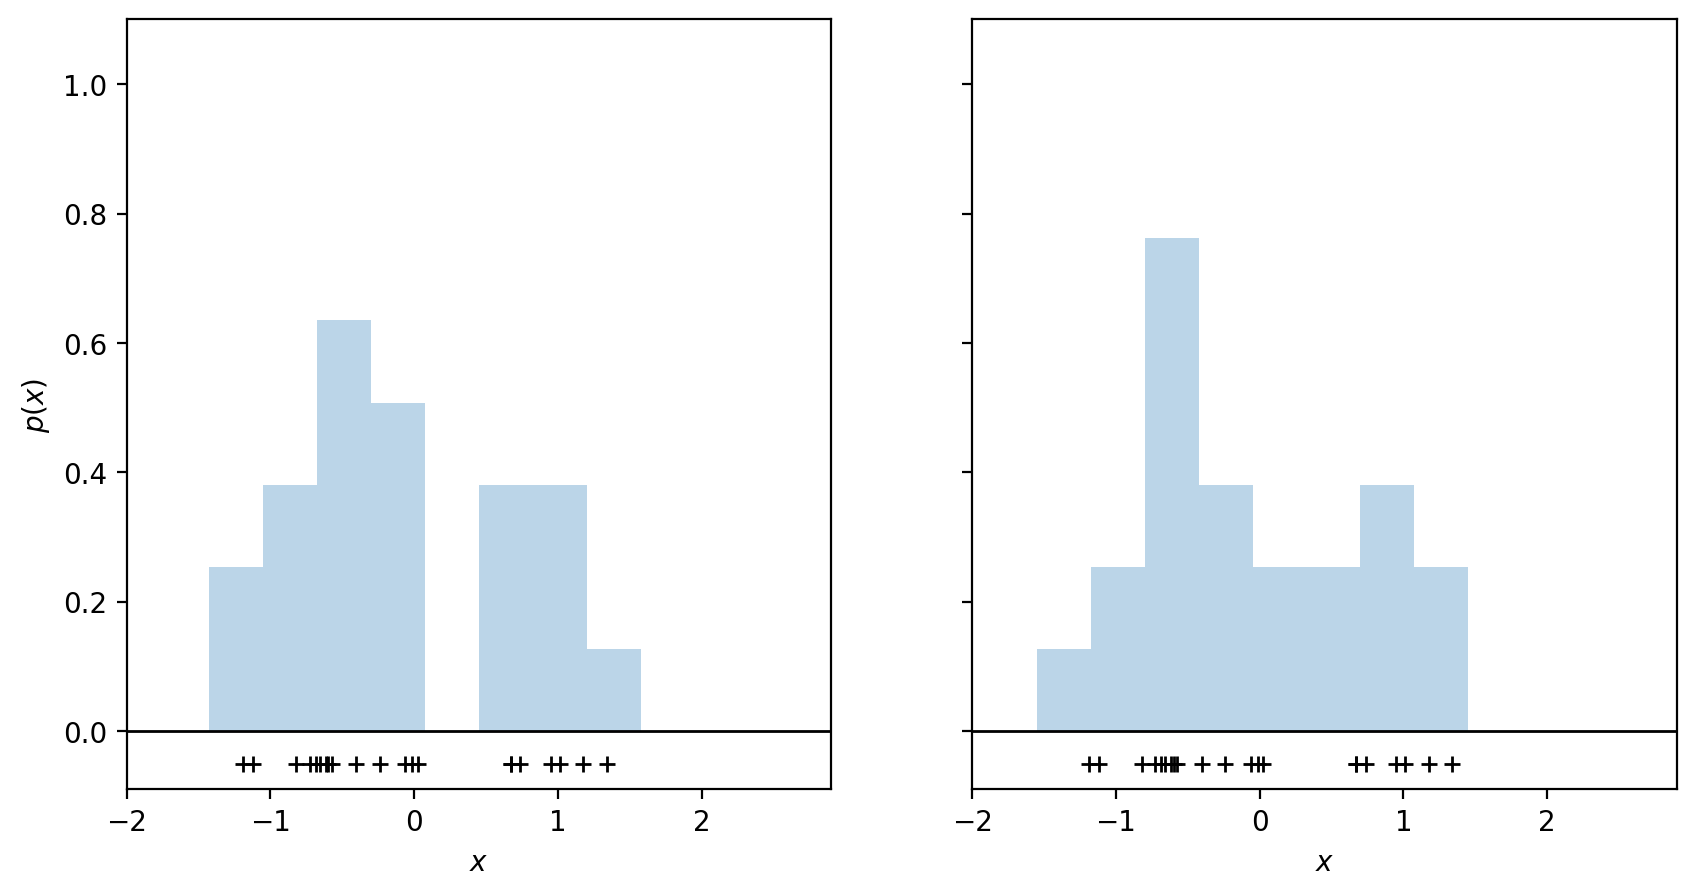

In [1]:
# Execute this cell
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

#------------------------------------------------------------
# Draw some random data
# I.e. N(-0.5, 0.3) and N(1, 0.3)
np.random.seed(1)
x = np.concatenate([np.random.normal(-0.5, 0.3, size=14), 
                    np.random.normal(1, 0.3, size=7)])


# Modified from Ivezic, Figure 6.1, modified by GTR, DS 
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
#------------------------------------------------------------

# First figure: silly histogram binning
fig1 = plt.figure(figsize=(10, 5))
#fig1.subplots_adjust(left=0.12, right=0.95, wspace=0.05, 
#                    bottom=0.15, top=0.9, hspace=0.05)

FC = '#6666FF'
XLIM = (-2, 2.9)
YLIM = (-0.09, 1.1)

ax = fig1.add_subplot(121)
bins = np.linspace(-1.8, 2.7, 13)
ax.hist(x, bins=bins, density=True, 
        histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

#Shift bin centers by 0.25
ax = fig1.add_subplot(122)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.hist(x, bins=bins + 0.25, density=True, 
        histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')

plt.show()

The data points that make up the histogram are the same in both panels.  All we have done is shifted the locations of the bins by 0.25. ***The choice of number of bins and the location of bin centers can really change the histogram that we make.***

The next panels are what happens if we center the bins on each point. This is an example of **kernel density estimation** using a "***top-hat***" kernel. It is a good description of the data, but pretty ugly.

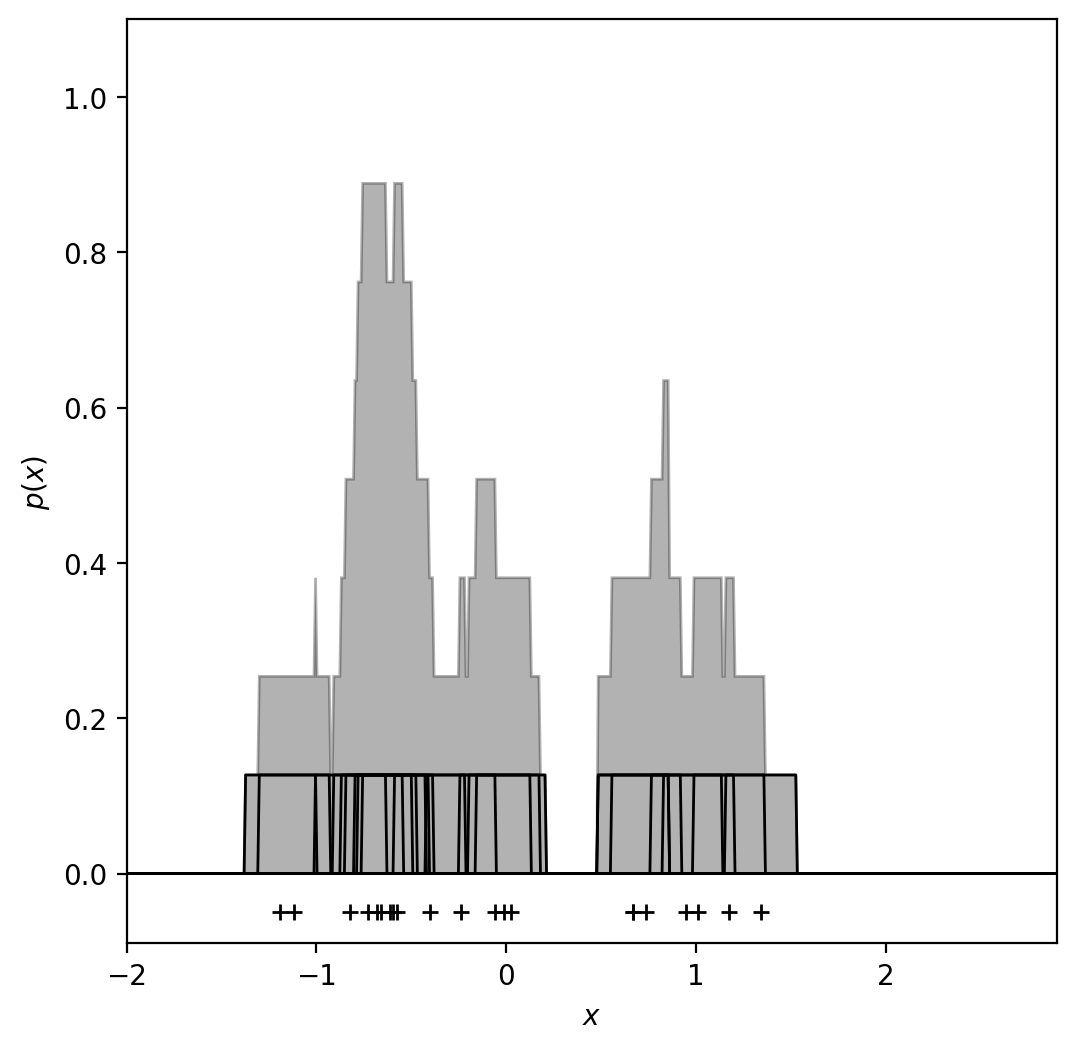

In [3]:
fig1b, ax = plt.subplots(figsize=(6, 6))

#ax.xaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)   # linear grid for calculating the kernel
# Calculate the top-hat kernel for each of the 14+7 = 21 data points (=> y -> array of (1000,21))
y_plot = (abs(x_plot - x[:, None]) <=  0.5 * binwidth).astype(float) 
y_plot /= (binwidth * len(x))   # normalise 

# Now sum the bins
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)

ax.plot(x, 0 * x - 0.05, '+k')    # Plot location of data points / bin centers 
ax.plot(x_plot, y_plot.T, '-k', lw=1)   # plot top-hat on top of each bin   

# Uncomment this line to see the top hat for one point 
# pt_id = 3
#ax.plot(x_plot, y_plot.T[:,pt_id], '-k', lw=1)      # One point

ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$')
ax.set_xlabel('$x$')

plt.show()

For the standard histogram, each point in the histogram contributes one unit to the height of the histogram at the position of its bin. For the histogram above, we have associated a bin to each point, allowing for overlapping bins. 

We can make it look nicer by choosing a different kernel, i.e. a different bin shape. The next plot shows a **KDE using a Gaussian kernel**.


Text(0, 0.5, '$p(x)$')

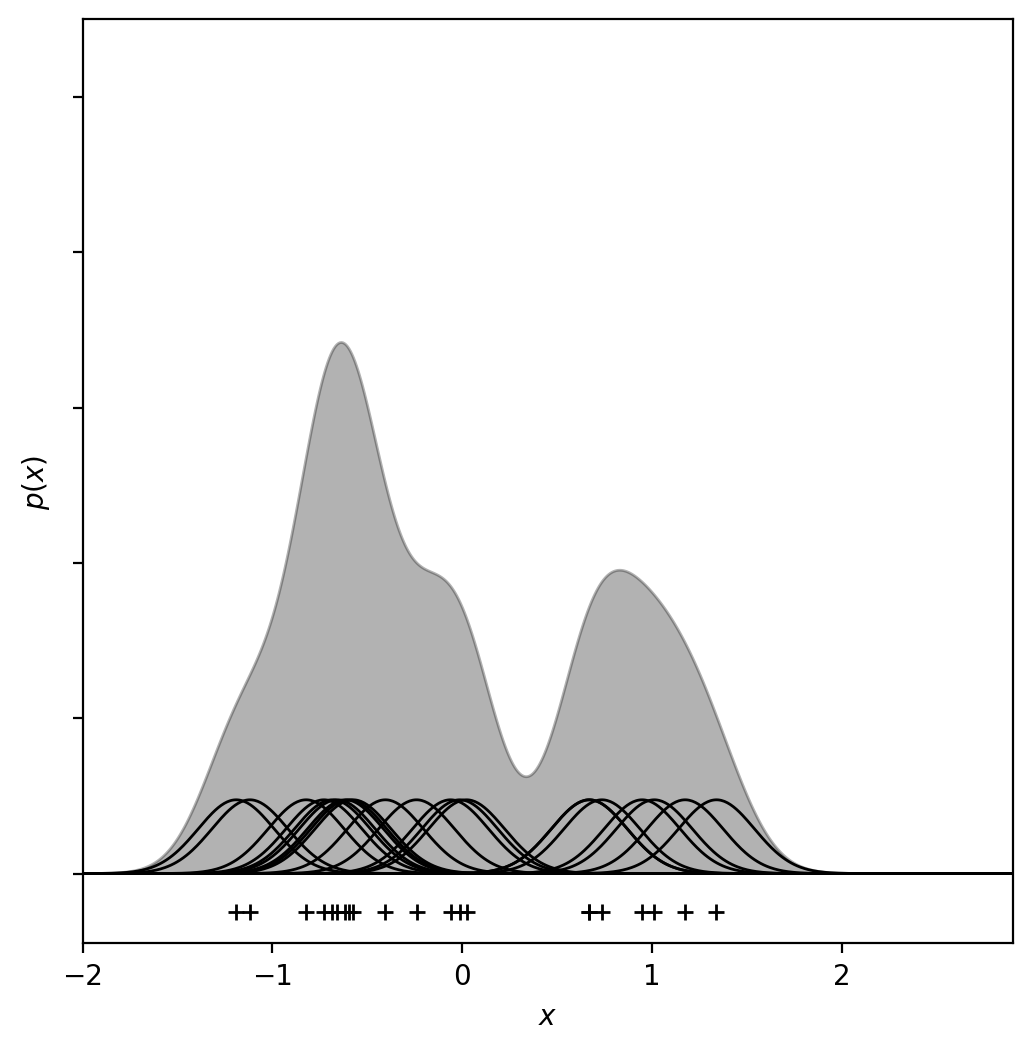

In [4]:
#------------------------------------------------------------
# First figure: transition to KDE
fig2, ax = plt.subplots(figsize=(6, 6))
## Just right
ax.yaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
# We now replace the top-hat kernel by a gaussian kernel 
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.2)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

We can think of KDE as replacing the points with "clouds". Each cloud is described by the kernel $K(u)$, where $K(u)$ can be any function that is:
- smooth,
- postive definite,
- normalizes to unity, 
- has zero mean,
- has positive variance. 

A common kernel is the **Gaussian kernel** that we just used above:

$$ K(u) = \frac{1}{(2\pi)^{D/2}}\exp{(-u^2/2)}$$

where $D$ denotes the dimensionality of the data. Once a kernel is chosen the KDE at a point, $x$, is given by 

$$ 
\hat{f} (x) = \frac{1}{Nh^D}\sum_{i=1}^N K\left(\frac{d(x,x_i)}{h}\right),
$$

where $\hat{f}$ is an ***estimator*** of our distribution.

The argument of $K$ is just some measure of the distance between $x$ and each $x_i$ "normalised" by a quantity $h$. So $u \equiv d(x,x_i) / h = (x-x_i) / h$. For the gaussian kernel that makes $h=\sigma$. So, $h$ represents the "width" or what is usually called the **"bandwidth"** in this context.

**The Epanechnikov kernel is "optimal" because it minimizes the variance of the kernel density estimate**: 

$$K(u) = \frac{3}{4}(1-u^2),$$

for $|u|\le 1$ and 0 otherwise. 

Let's also note here a nice property of the kde is that it does not only inherits the smoothness properties of the kernel, but also its *differentiability*!  

Below is a code that compares the various kernels.  

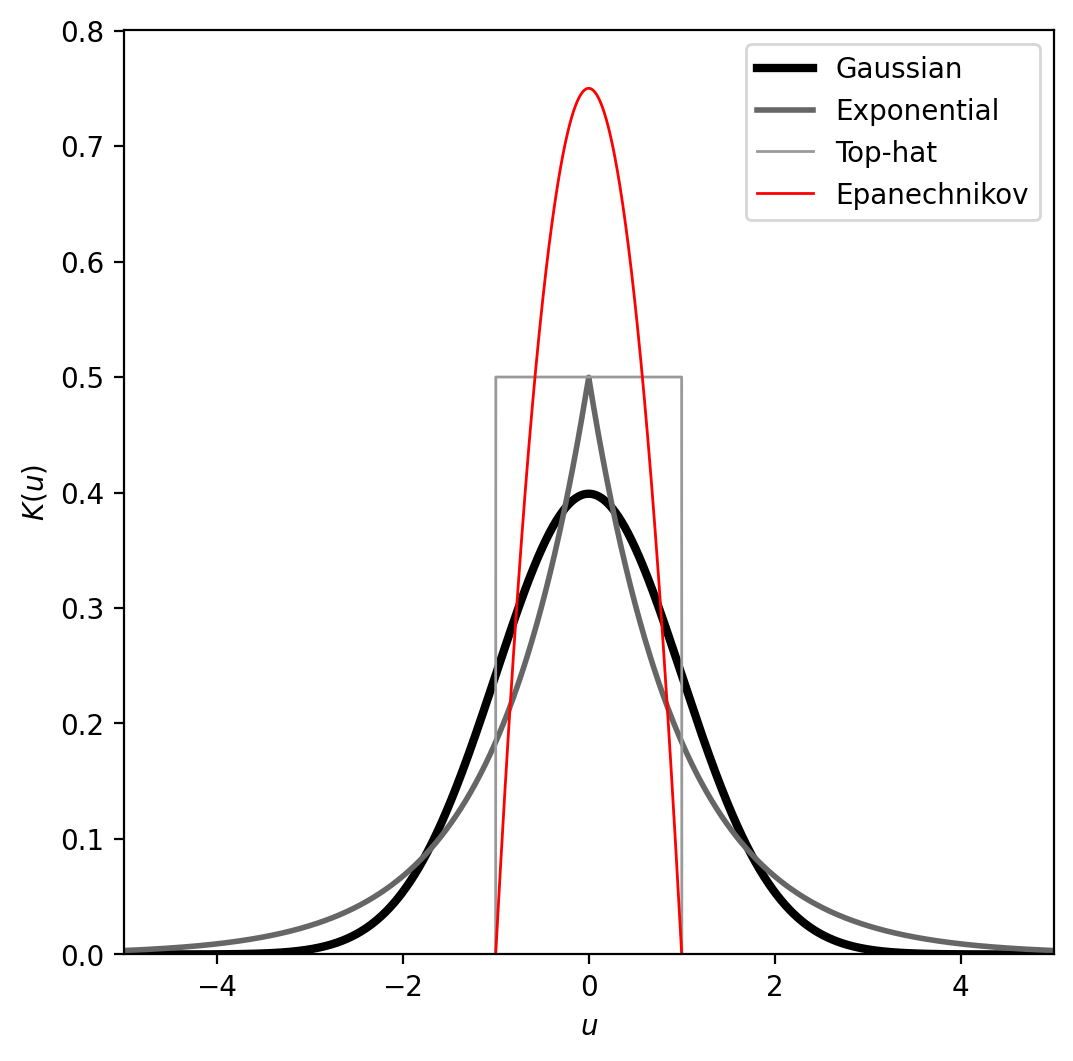

In [5]:
#------------------------------------------------------------
# Compute Kernels.
xgrid = np.linspace(-5, 5, 10000)
dx = xgrid[1] - xgrid[0]

# Gaussian kernel
gauss = (1. / np.sqrt(2 * np.pi)) * np.exp(-0.5 * xgrid ** 2)

# Exponential kernel
exp = 0.5 * np.exp(-abs(xgrid))

# Top-hat kernel
tophat = 0.5 * np.ones_like(xgrid)
tophat[abs(xgrid) > 1] = 0 # Range of the tophat kernel

# Epanechnikov kernel 
ep = 3/4 * (1-xgrid**2)  # Add the Epanechnikov kernel function
ep[np.abs(xgrid)>1] = 0 # Set the range of the kernel

#------------------------------------------------------------
# Plot the kernels
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(xgrid, gauss, '-', c='black', 
        lw=3, label='Gaussian')
ax.plot(xgrid, exp, '-', c='#666666', 
        lw=2, label='Exponential')
ax.plot(xgrid, tophat, '-', c='#999999', 
        lw=1, label='Top-hat')
# Add the Epanechnikov kernel to the plot
ax.plot(xgrid, ep, '-', c='red', 
        lw=1, label='Epanechnikov')  

ax.legend(loc=1)

ax.set_xlabel('$u$')
ax.set_ylabel('$K(u)$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.8001)
plt.show()

You may **look at this [link](https://shinyserv.es/shiny/kde/)** for experimenting with kde.  

So, now, the only remaining question is **How to determine the optimal bandwidth?**  

You know the answer. Maybe if we cast the problem differently, the latter will be obvious: the problem consists in finding a model (of the underlying pdf) which is such that I recover a very similar model if I add new points (or get a new sample of points). In other words, I am seeking for a model that is unbiased and with little variance... Remember that in [Lecture 2](../02_Regression/Regression.ipynb) we have seen a method that exactly does this, this is the *cross validation*!  

Let's do this using the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) method of `sklearn.model_selection`. You may also want to have a look at [sklearn.neighbors.KernelDensity](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html) to find out the parameters of the `KernelDensity` method ... and [here](https://scikit-learn.org/stable/modules/density.html#kernel-density) for a sckit-learn guided tour through Kernel density estimation. 

In [7]:
# Let's do the optimal bandwidth search using a gaussian Kernel. 
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

bwrange = np.linspace(0.01,1.0, 30) # Test 30 bandwidths from 0.1 to 1.0
print(bwrange)
K = 5 # Do 5-fold cross validation
# KernelDensity default uses a GAUSSIAN kernel 
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv= K) # Try each bandwidth with K-folds
grid.fit(x[:, None]) #Fit the histogram data that we started the lecture with.
h_opt = grid.best_params_['bandwidth']
print('Best bandwidth = ', h_opt)

[0.01       0.04413793 0.07827586 0.11241379 0.14655172 0.18068966
 0.21482759 0.24896552 0.28310345 0.31724138 0.35137931 0.38551724
 0.41965517 0.4537931  0.48793103 0.52206897 0.5562069  0.59034483
 0.62448276 0.65862069 0.69275862 0.72689655 0.76103448 0.79517241
 0.82931034 0.86344828 0.89758621 0.93172414 0.96586207 1.        ]
Best bandwidth =  0.14655172413793105


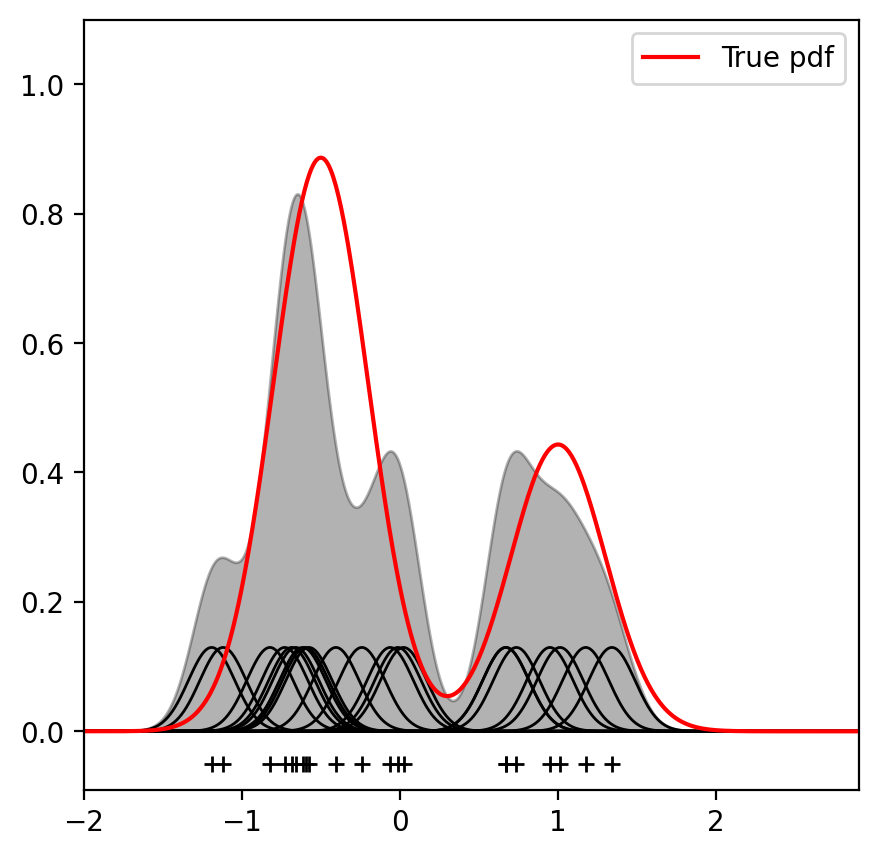

In [8]:
# Execute this cell to see the new "histogram"
fig, ax = plt.subplots(figsize=(5, 5))
# Formatting of the axis ticks
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.yaxis.set_major_formatter(plt.NullFormatter())

binwidth = bins[1] - bins[0]
x_grid = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_grid, x[:, None], h_opt)    # We use normal kernel also for visualisation
y_plot /= (binwidth * len(x))

ax.fill(x_grid, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_grid, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')

# Overlay the original gaussian profile
g_truth = 2./3. * stats.norm.pdf(x_grid, -0.5, 0.3) + 1./3 * stats.norm.pdf(x_grid, 1, 0.3)
ax.plot(x_grid, g_truth, color='red', label='True pdf')
ax.legend()

ax.set_xlim(XLIM)
ax.set_ylim(YLIM)

plt.show()

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
KDE approximation of pdf is implemented in seaborn through the method `sns.kdeplot()`. In the latter case it uses [scipy.stats.gaussian_kde()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) and derives the band-width using a "rule-of-thumb" approach called "Scott's rule". The bandwidth is $h = n^{(-1/(d+4))}$, where $n$ is the number of data points and d is the dimension. Another method implemented in scipy is the "Silverman's rule" where $h = (n * (d+2))^{(-1/(d+4))}$. See the documentation of `gaussian_kde()` in scipy for details and references. 

In [9]:
# Calculation of the optimal width using Scott's rule and Silverman's rule
n = len(x)
d = 1 
h = n**(-1 / (d+4))
h_silverman = (n * (d + 2) / 4.)**(-1. / (d + 4))
h, h_opt, h_silverman

(0.5439464428888785, np.float64(0.14655172413793105), 0.5761610405615962)

(-2.0, 2.0)

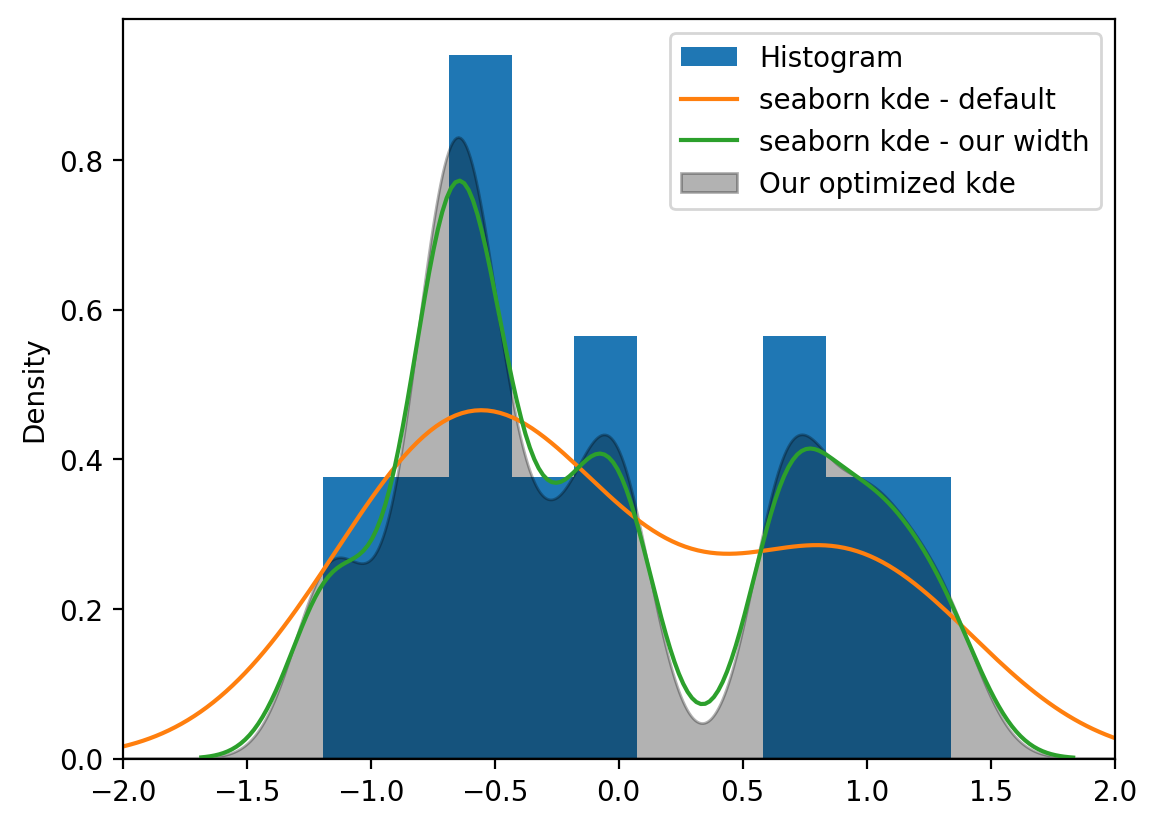

In [10]:
import seaborn as sns 
f, ax = plt.subplots()
#sns.displot(x, ax=ax, kind='kde')
ax.hist(x, density=True, label='Histogram')
sns.kdeplot(x, ax=ax, label='seaborn kde - default')
# Check that kdeplot default uses scott's rule - uncomment below for the check
#sns.kdeplot(x, ax=ax, bw_method=h,  label='seaborn kde - scott-manual') 

# Herebelow, I set the width of the kde from our optimized gaussian kernel 
# the factor bw_adjust is an empirical rescaling of the width that DS has set-up
sns.kdeplot(x, ax=ax, bw_method=h_opt, bw_adjust= np.sqrt(2), label='seaborn kde - our width')
ax.fill(x_grid, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3, label='Our optimized kde')

# Overlay also the true PDF from which the data points are drawn
#g_truth = 2./3. * stats.norm.pdf(x_grid, -0.5, 0.3) + 1./3 * stats.norm.pdf(x_grid, 1, 0.3)
#ax.plot(x_grid, g_truth, color='red', label='True pdf')

ax.legend()
ax.set_xlim(-2,2)

We see that the kernel width optimized using cross validation is rather different from the one using "scott's rule". In many situations, this is not really a problem as the kde is used rather for visualisation purposes. 

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-success"> 
The take-home from this comparison with seaborn is four-folds: 
- Beware of black-boxes and default values
- Sklearn enables you to be a bit more flexible (than seaborn) as you can implement other kernels (e.g. Epanechnikov)
- The best choice is often a trade-off between speed, data content, and your a priori knowledge of your data. The latter can guide your choice of band-width.
- If you use KDE for **quantitative measurements**, you may really want to **be careful** and make the best motivated choice. If this is only for qualitative information, this may be less critical.

A complementary approach for choosing an optimal bindwidth for an histogram (without using KDE) is discussed by David Hogg in this arXiv post: [https://arxiv.org/abs/0807.4820](https://arxiv.org/abs/0807.4820)

##### 2-D Histograms: 

Here is an example of KDE applied to 2D histograms. 

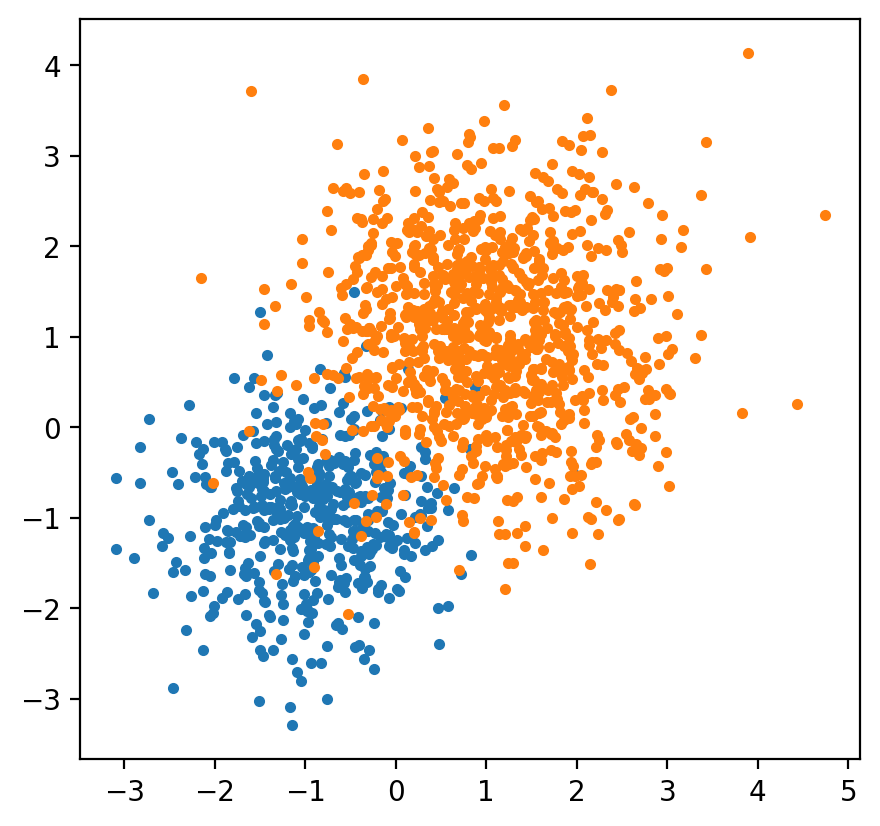

In [11]:
# Two 2-D normal distributions with offset centroids

# 2 sets of data points drawn from two 2D bivariate normal distrib 
G1 = np.random.normal([-1,-1],[0.75,0.75], size=(500,2))
G2 = np.random.normal([1,1],[1,1], size=(1000,2))
X = np.concatenate([G1, G2]) 
f, ax = plt.subplots()
ax.scatter(G1[:,0], G1[:,1], marker='.')
ax.scatter(G2[:,0], G2[:,1], marker='.')
ax.set_aspect('equal')

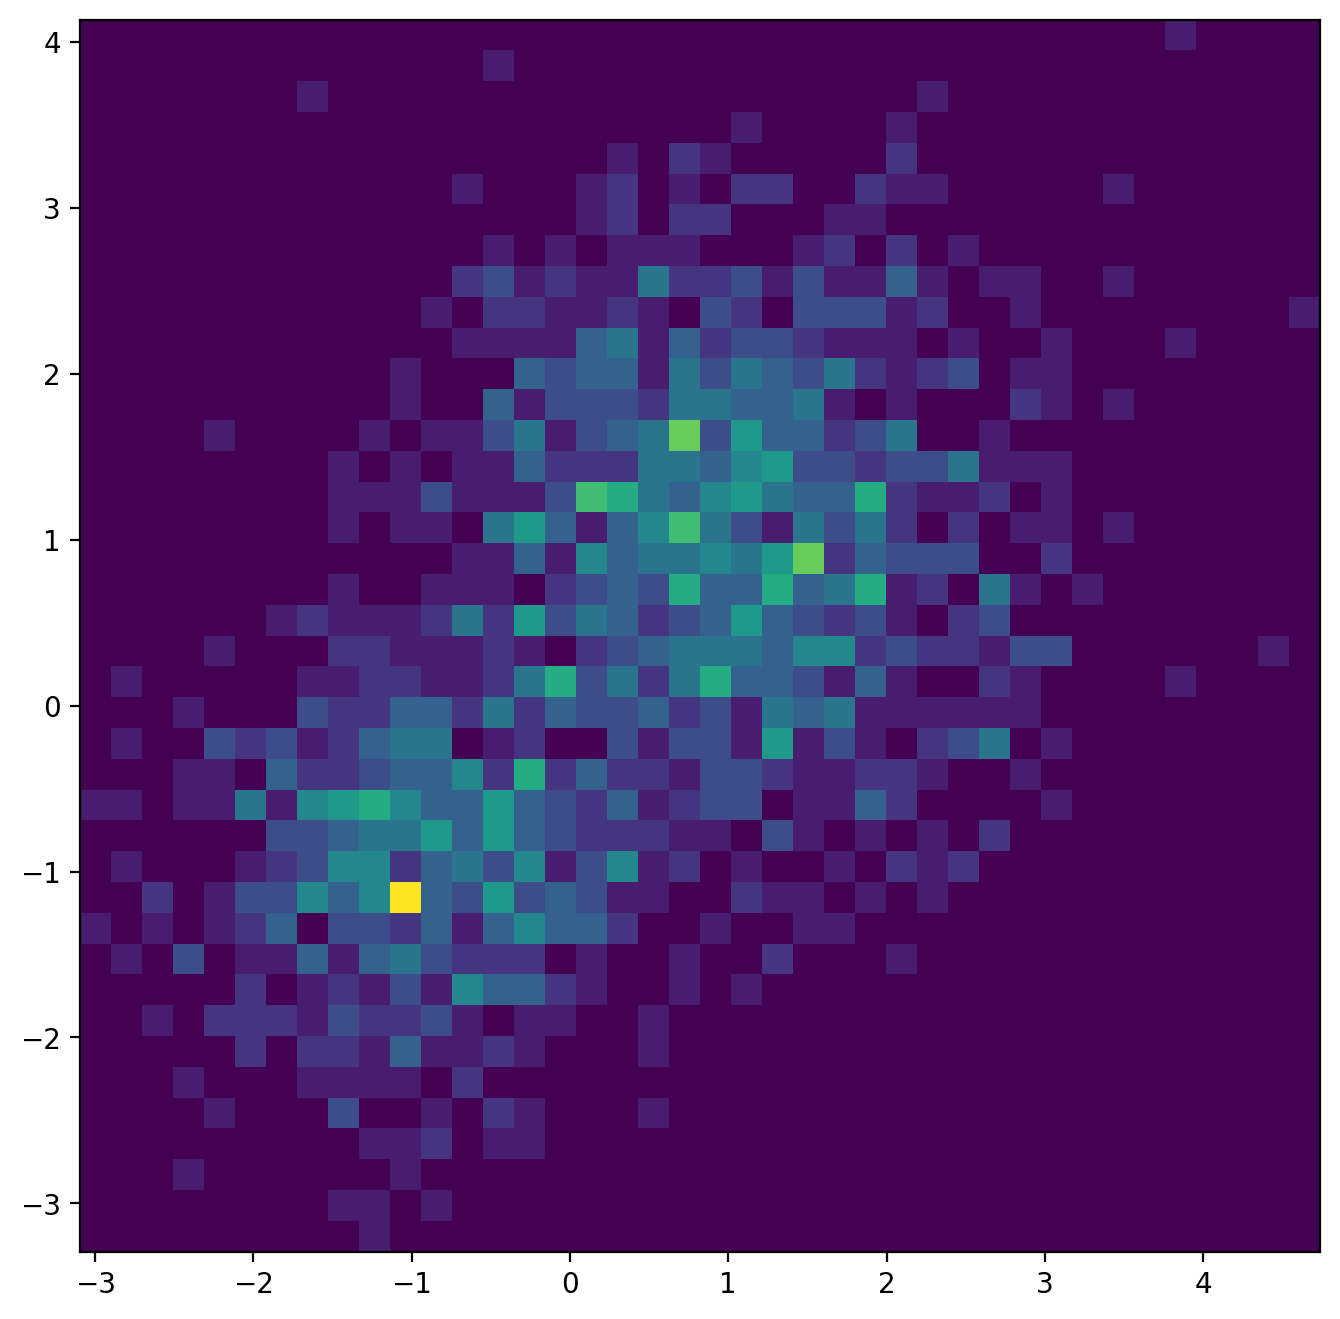

In [12]:
# We can also plot a 2D histogram ... 
f, ax = plt.subplots(figsize=(8,8))
ax.hist2d(X[:,0], X[:,1], bins=40);

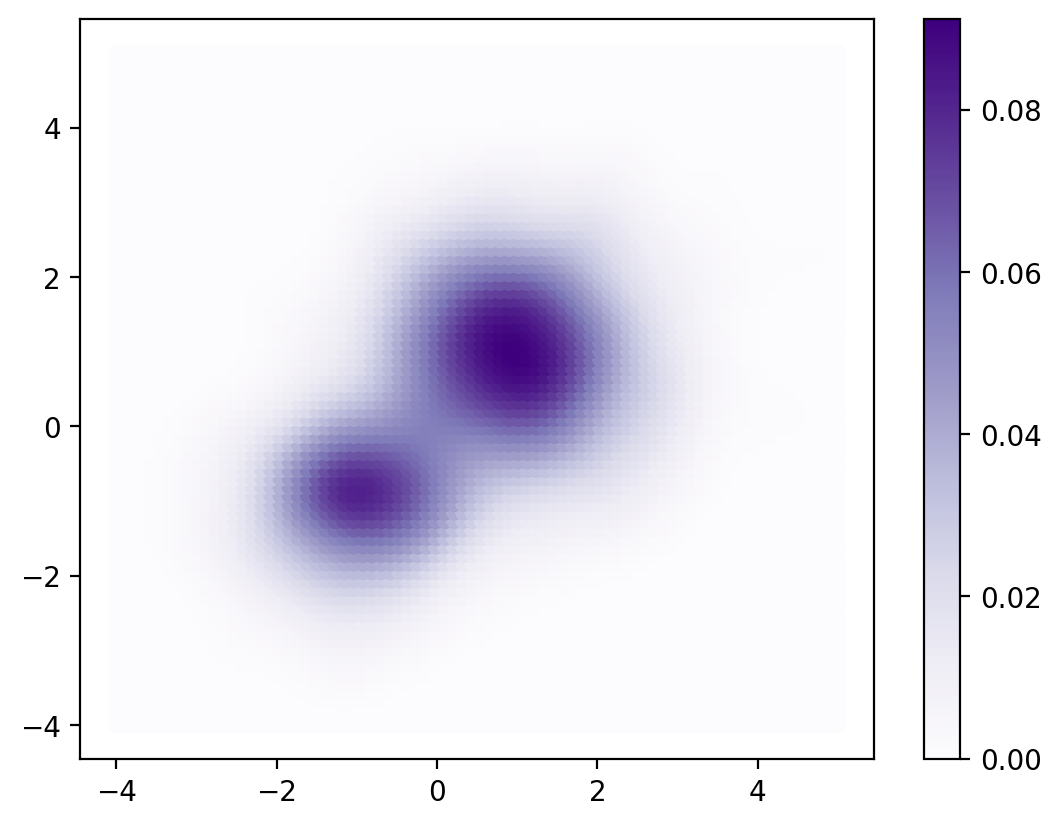

In [13]:
# Now let's fit a 2D KDE 
# See what happens when you change the the bandwidth (and/or kernel).
#kde = KernelDensity(kernel='epanechnikov', bandwidth=0.9)
kde = KernelDensity(kernel='gaussian', bandwidth=0.4)
kde.fit(X) #evaluate the kde on the data for the chosen bw
#print(kde.get_params())

# let's evaluate the result of the fit on a grid of values "(u_i, v_j)"
u = v = np.linspace(-4,5,80)
U, V = np.meshgrid(u, v)

# Now we need to evaluate the density (i.e. likelihood of the pdf) on that grid ... 
# and deal with the sklearn format => we need first to build a matrix with all 
# the coordinates along 2 columns 
# each row is "a sample" of the feature matrix 
Xgrid = np.zeros(shape=(len(u) * len(v), 2)) 
for i in range(Xgrid.shape[0]):
    Xgrid[i, 0] = np.ravel(U)[i]    # axis x
    Xgrid[i, 1] = np.ravel(V)[i]   # axis y

# now, we can evaluate the probability by taking the exp(loglikelihood) 
# kde.score_samples -> loglikelihood for each data points of the grid
dens = np.exp(kde.score_samples(Xgrid)) #evaluate the model on the grid 

plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens, 
            cmap="Purples", edgecolor="None")
plt.colorbar()

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-warning"> 
**Exercise:** We now want do a data-driven selection of the bandwidth. That's a cross validation on a 2d KDE, which sounds complicated. Actually, look at how easy this is! Just copy the example from above to a new cell and splice in the cross validation code to produce a new plot with the "optimal" bandwidth.  Basically, splice in the lines of code for `GridSearchCV` between the lines setting `X` and instantiating `kde`.  Then replace the hardcoded bandwidth with the optimal value you computed.

In [ ]:
####You may paste the gridsearch from here...

# PASTE CODE HERE !

### ... to here

kde = KernelDensity(kernel='gaussian', bandwidth=h_opt) # Changed bandwidthhere.
kde.fit(X) 

u = v = np.linspace(-4,5,80)
Xgrid = np.vstack(map(np.ravel, np.meshgrid(u, v))).T
dens = np.exp(kde.score_samples(Xgrid))

plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens, 
            cmap="Purples", edgecolor="None")
plt.colorbar()



Here as well, we can make a kde estimate of the 2D histogram using `sns.kde_plot()`

Text(0.5, 1.0, 'seaborn kde - default')

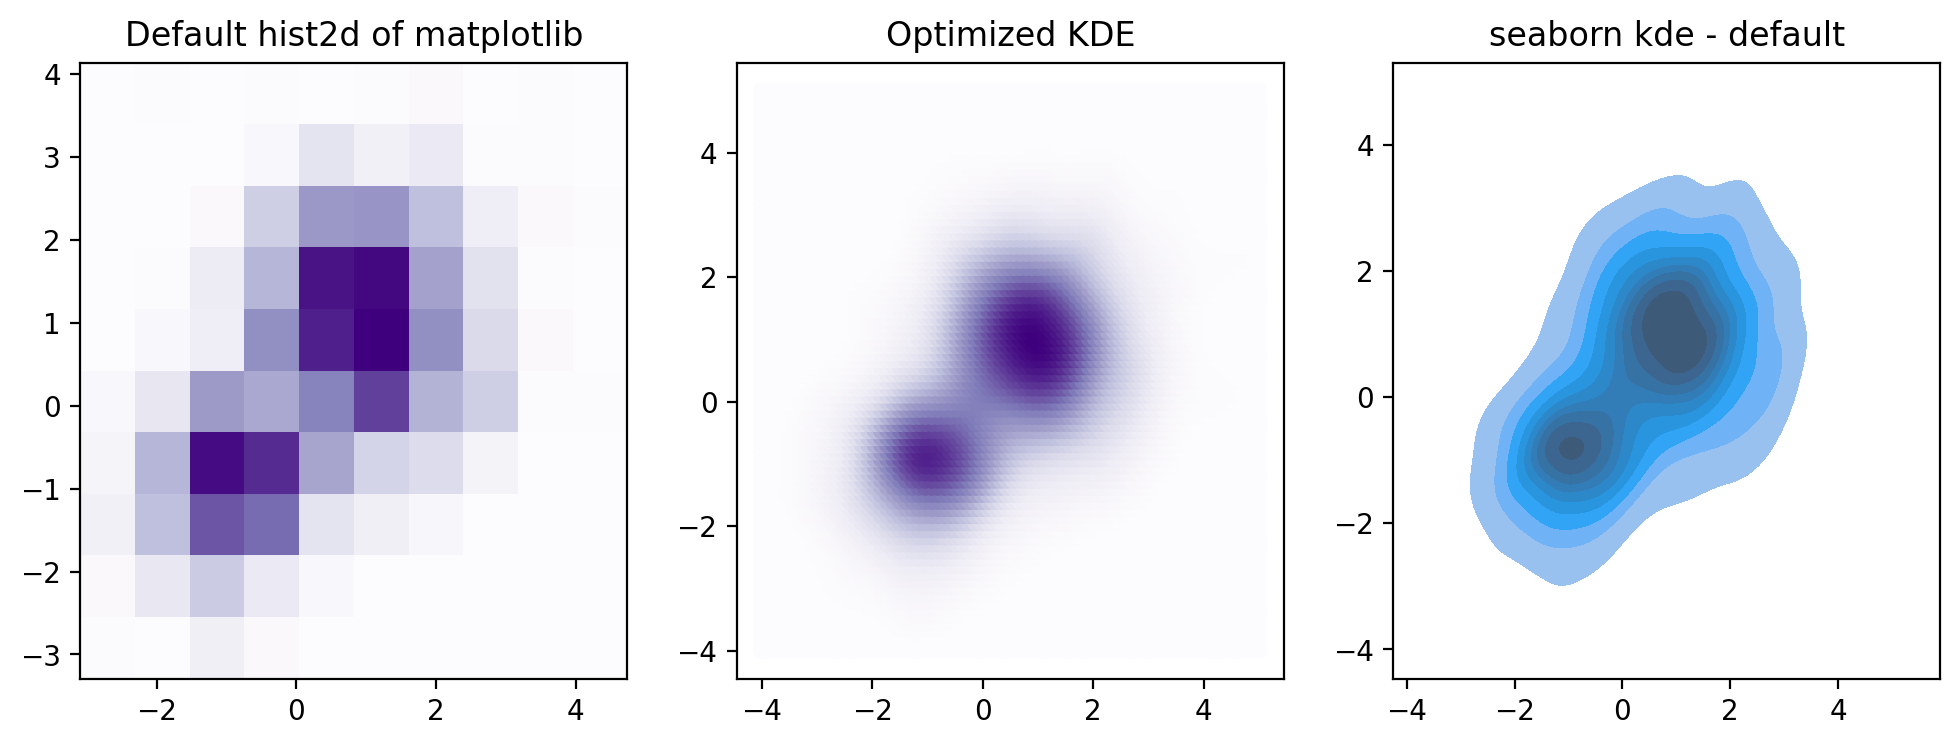

In [15]:
f, ax = plt.subplots(ncols =3, figsize=(12,4))
ax[0].hist2d(X[:,0], X[:,1], cmap="Purples")
ax[0].set_title('Default hist2d of matplotlib')
ax[1].scatter(Xgrid[:,0], Xgrid[:,1], c=dens, cmap="Purples", edgecolor="None")
ax[1].set_title('Optimized KDE')
sns.kdeplot(x=X[:,0], y=X[:,1], fill=True, ax=ax[2])
ax[2].set_title('seaborn kde - default')

#### Nearest-Neighbor Density Estimation

Another very simple way to estimate the density of an $N$-dimensional distribution is to look to the nearest point (or the $K$ nearest points) and compute their distances, $d_K$.  This is the [$K$-Nearest Neighbor](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm. The density at a given point, $x$ is estimated as

$$\hat{f}_K(x) = \frac{K}{V_D(d_K)},$$

where $V_D(d)$ are the standard area (volume) of the "parameter space" in 2D and 3D, namely for $D=2$, we have $V_2 = \pi d^2$, and for $D=3$, we have $V_3 = 4/3 \, \pi d^3$. For an arbitrary number of dimensions, it is given generically by $V_D = \frac{2d^D\pi^{D/2}}{D\Gamma(D/2)}$,  where $\Gamma$ is the complete gamma function.

Because the volume in N-dimension is $V_D \propto d_K^D$, we can simplify this formula to 

$$\hat{f}_K(x) = \frac{C}{d_K^D}$$

and evaluate the constant $C$ at the end.

This estimator has some intrinsic bias, which can be reduced by considering *all* $K$ nearest neighbors (i.e. all nearest neighbour until the neighbour $K$) instead of only the distance to the K th-nearest neighbor. Given the distances to all $K$ neighbors, d_i, i=1, ..., K, we have (see Ivezic et al. 2005, AJ, 129, 1096):
$$\hat{f}_K(x) = \frac{C}{\sum_{i=1}^K d_i^D}$$

See also the [Scikit-Learn `neighbors` documentation](http://scikit-learn.org/stable/modules/neighbors.html) for more information.

Ivezic, Figure 6.5 compares a Nearest Neighbor ($k=10$) with a KDE algorithm. Let's see what happens as you increase the number of neighbors used.

In [16]:
from astroML.density_estimation import KNeighborsDensity
from astropy.visualization import hist
from sklearn.neighbors import KernelDensity

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
#  this is the same data used in the Bayesian Blocks figure
np.random.seed(0)
N = 10000
# let's take a sum pf 5 cauchy distributions 
# cauchy distrib. is characterised by 2 params, mu and gamma. 
# The third param below is the relative weight "f" of each distribution 
# Chosen such that the sum of the 5 distrib. is 1
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]


In [17]:
# Let's define a function that sums n cauchy pdfs
def true_pdf(x, mu_gamma_f):
    true_pdf = 0
    for (mu, gamma, f) in mu_gamma_f:
        true_pdf += f * stats.cauchy(mu, gamma).pdf(x) 
    return true_pdf

# short version of the above function using list comprehension and "dummy" lambda function 
#true_pdf = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x) 
#                          for (mu, gamma, f) in mu_gamma_f])

# Draw random data points from the different cauchy distributions 
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N)) 
                    for (mu, gamma, f) in mu_gamma_f])

np.random.shuffle(x)  # shuffle x as we have concatenated x from individual cauchy.rvs()
x = x[x > -10]
x = x[x < 30]

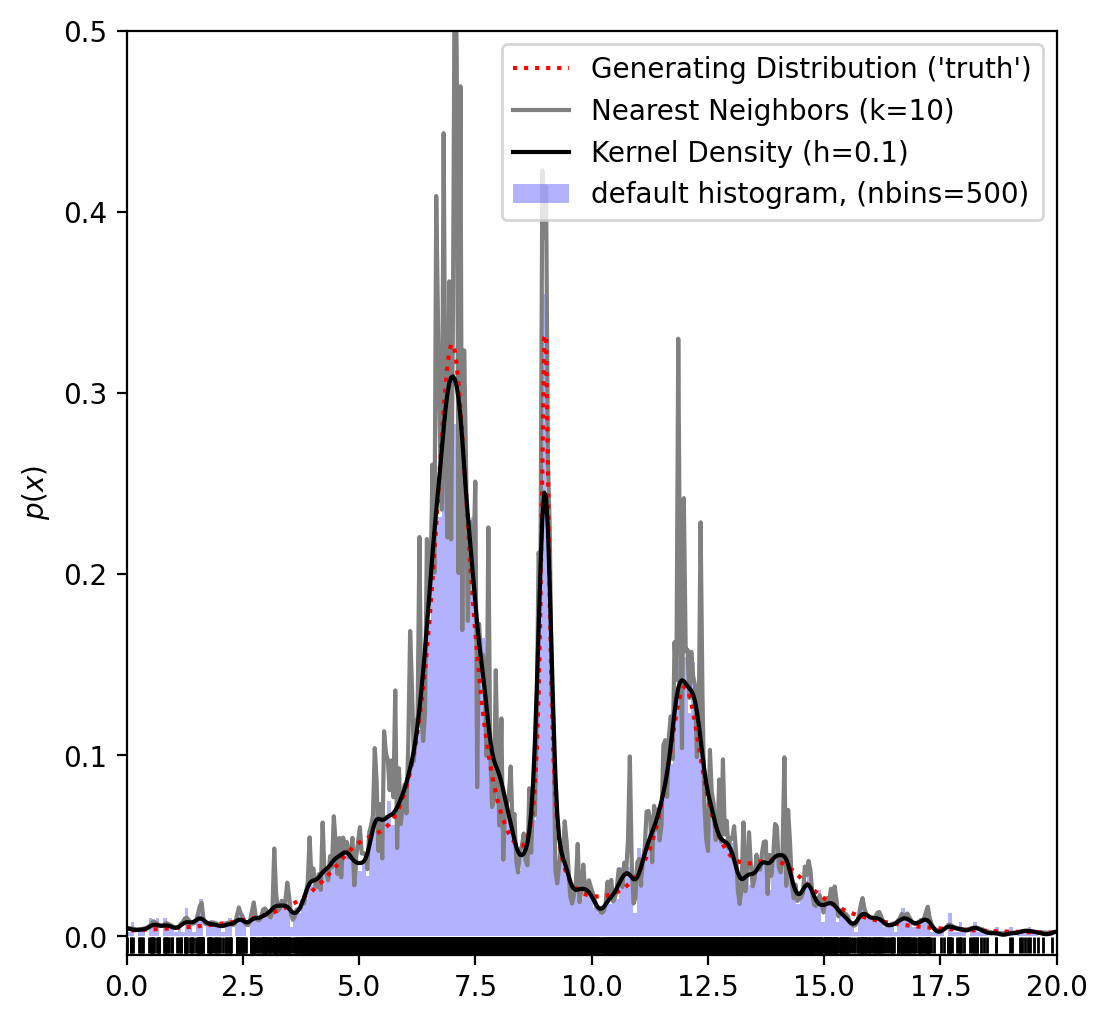

In [18]:
# plot the results
# **change the 2 values N and k** to see the impact of the number of points and number of neighbour on the results !
fig = plt.figure(figsize=(6, 6))
N = 5000  # Total number of points  ; !Change it  - consider e.g. < 500 pts! 
k = 10 #Number of neighbors  ! CHANGE IT ! 

xN = x[:N]
t = np.linspace(-10, 30, 1000)

# Compute density with KDE
kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde.fit(xN[:, None])
dens_kde = np.exp(kde.score_samples(t[:, None]))

# Compute density with Bayesian nearest neighbors
nbrs = KNeighborsDensity('bayesian', n_neighbors=k)
nbrs.fit(xN[:, None])
dens_nbrs = nbrs.eval(t[:, None]) / N

# plot the results
plt.plot(t, true_pdf(t, mu_gamma_f), ':', color='red', 
         zorder=3, label="Generating Distribution (\'truth\')")
plt.plot(xN, -0.005 * np.ones(len(xN)), '|k')
plt.plot(t, dens_nbrs, '-', lw=1.5, color='gray', 
         zorder=2, label="Nearest Neighbors (k=%i)" % k)
plt.plot(t, dens_kde, '-', color='black', 
         zorder=3, label="Kernel Density (h=0.1)")
Nbin = 500
plt.hist(xN, density=True, alpha=0.3, color='blue', bins=Nbin, label="default histogram, (nbins=%i)"%Nbin)

# label the plot
plt.ylabel('$p(x)$')
plt.legend(loc='upper right')
plt.xlim(0, 20)
plt.ylim(-0.01, 0.5001)

plt.show()

The results depend substantially on the number of points **and** on the number of neighbours. With only **10** neighbors, the nearest neighbors becomes very noisy. With less points and less neighbours, it yields stronger peaks. This highlights the ability of this method in enhancing the presence of local overdensities. 

<a class="anchor" id="det1"></a> <div class="alert alert-block alert-success"> 
The method is particularly powerful when it comes at identifying **local overdensities** (few number of neighbours). This [paper](https://ui.adsabs.harvard.edu/abs/2010ApJ...708..717S/abstract) by Sesar et al. 2010 use this approach to identify overdensities of RR-Lyrae stars on the sky. 

Note that there is also a kNN used for *classification*. The idea is to calculate the distance (L1 or L2) to k-neighbours in in D-dimension feature space, and classify based on the majority of votes among the k-nearest neighbours. This is described [here](https://scikit-learn.org/stable/modules/neighbors.html#classification), and implemented by using the estimator [`sklearn.neighbors.KNeighborsClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

#### Optional Exercise: 

Compare the use of KDE and K-neighbours method on the data of the "great wall". Using only 5 nearest neightbours, you may enhance the structures on small scale and using 40 nearest neighbors, you may enhance the structures on large scales. 

The solution of this comparison may look like this:

![https://www.astroml.org/_images/fig_great_wall_1.png](https://www.astroml.org/_images/fig_great_wall_1.png)

You can download the great wall data using `astroML.datasets.fetch_great_wall()`

Text(0, 0.5, '$d$ (Mpc)')

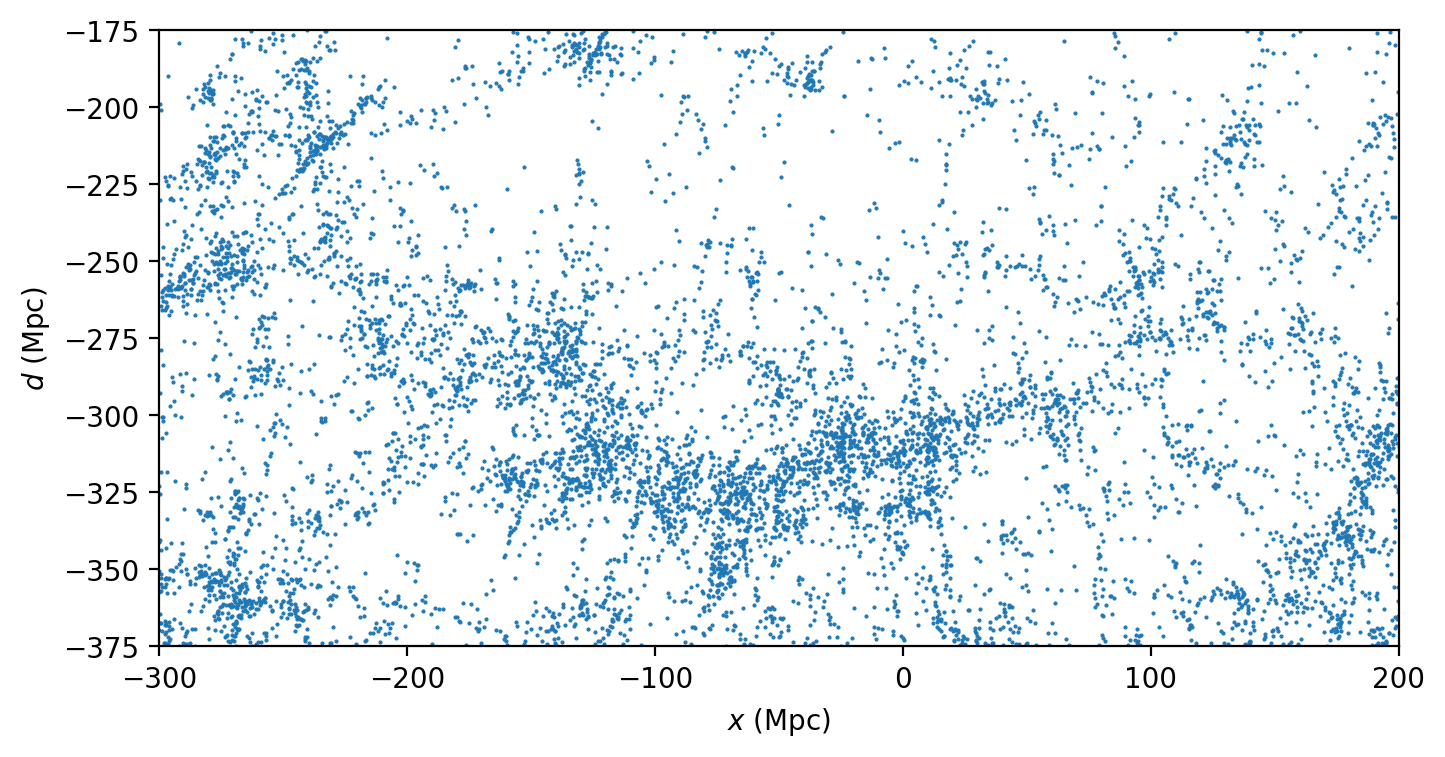

In [19]:
# Start of the exercise 
from astroML.datasets import fetch_great_wall
# Fetch the great wall data
X = fetch_great_wall()
f, ax = plt.subplots(figsize=(8,4))
ax.scatter(X[:,1], X[:, 0], marker='.', s=1)  
ymin, ymax = (-375, -175)
xmin, xmax = (-300, 200)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
ax.set_xlabel('$x$ (Mpc)')
ax.set_ylabel('$d$ (Mpc)')


### Parametric Density Estimation 

#### Gaussian Mixture Models (GMM)

This is a variation around the same idea as the KDE. For the KDE, we have defined kernels for each points. In a gaussian mixture model, we do NOT use a kernel for each data point, but rather we fit for the ***locations of the kernels*** in addition to the width. So a mixture model is sort of a hybrid between a traditional (fixed bin location/size) histogram and KDE. 

The GMM may be seen as a way to accurately reproduce a complex distribution of points. It may **not** be well designed to find "how many distributions makes the truth". This is particularly true if the truth contains distributions that deviate from a Gaussian and / or if there is an underlying "background". Overall, GMM may be used in 2 different regimes: 

- Using lots of components may make sense if you just want to provide an accurate description of the density (as in density estimation). The use of a BIC/AIC to find an optimal number is then not really motivated (but beware that overfitting remains a risk when increasing too much the number of components !).  
- Using fewer components makes mixture models more like clustering (later today) but you may still want to use many components to separate the sample into real clusters and an underlying "background" mixed with the true clusters.

Gaussians are the most commonly used components for mixture models. So, the pdf is modeled by a sum of Gaussians:

$$p(x) = \sum_{k=1}^N \alpha_k \mathscr{N}(x|\mu_k,\Sigma_k),$$

where $\alpha_k$ are the "mixing coefficients" with $0\le \alpha_k \le 1$ and $\sum_{k=1}^N \alpha_k = 1$.

We can solve for the parameters using maximum likelihood analyis as discussed in SPAT0002. 

However, this can be complicated in multiple dimensions, requiring the use of [**Expectation Maximization (EM)**](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) methods (see textbook for details; Chapt. 4.4 and 6.3).

Ivezic Figure 4.2 (next cell) provides an example in 1-D of gaussian mixture.

In [20]:
# Ivezic v2, Figure 4.2
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Set up the dataset.
#  We'll create our dataset by drawing samples from Gaussians.

random_state = np.random.RandomState(seed=1)

X = np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1)

/Users/dsluse/miniconda3/envs/py_SPAT0086_py312/lib/python3.12/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [21]:
#------------------------------------------------------------
# Learn the best-fit GaussianMixture models
#  Here we'll use scikit-learn's GaussianMixture model. The fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC. ;  Note that the gaussian mixture has a method to calculate aic and bic. 
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

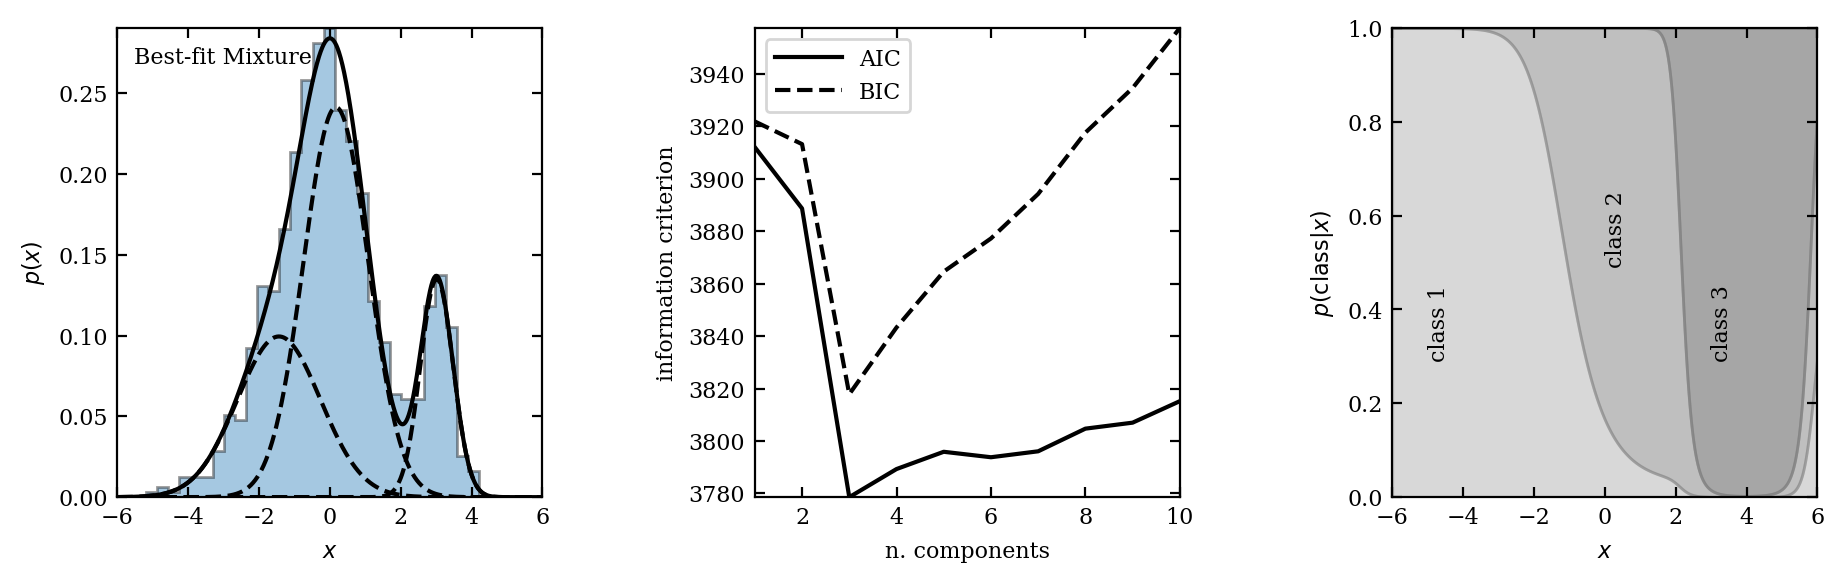

In [22]:
#------------------------------------------------------------
# Plot the results
#  We'll use three panels:
#   1) data + best-fit mixture
#   2) AIC and BIC vs number of components
#   3) probability that a point came from each component

fig = plt.figure(figsize=(10, 3.4))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)
# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

x = np.linspace(-6, 6, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)


# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 1', rotation='vertical')
ax.text(0, 0.5, 'class 2', rotation='vertical')
ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show()

#### Some applications of GMM 

We highlight hereafter two application of mixture models. The reader may also consult Kuhn and Feigelson 2017 ([arXiv:1711.11101](https://arxiv.org/abs/1711.11101)) for a fairly recent "review". 

##### Cloning n-D distributions with GMM  

For univariate distributions, one can clone data relatively easily, using the CDF of the observed data (and potentially smoothing it). Chapter 3 of our reference book (and supplementary Nb of SPAT0002) show how to proceed. For multi-variate data, the task is harder, but GMM enable one to tackle this task efficiently for an arbitrary number of dimensions! 

If you wonder what is the usefulfness of cloning a distribution, you may think of the situation where you want to simulate the increase in precision on a model if you were gathering new data, but you want to draw the new data from a distribution that accounts for the complexity of the reality. 

An example of cloning of a 2D distribution is given in Fig. 6.10 of our book: 

![https://www.astroml.org/_images/fig_GMM_clone_1.png](https://www.astroml.org/_images/fig_GMM_clone_1.png)

##### GMM with errors: Extreme deconvolution

When measurement uncertainties on the data points need to be accounted for, then one speaks of extreme deconvolution (XD). This extreme deconvolution generalizes the use of Expectation Maximisation to the case where data have measurements errors. 

An example of extreme deconvolution (as well as useful references) are given in our book. The method `XDGMM` of `astroML.density_estimation` implements "extreme deconvolution". Fig. 6.11 of the book provides an illustration for a simulate 2D distribution of points where positions are subject to uncertainties: 

![https://www.astroml.org/_images/fig_XD_example_1.png](https://www.astroml.org/_images/fig_XD_example_1.png)


### EXERCISE

Let's again work with the Iris data set (`datasets.load_iris()`). 
The objective of this exercise is to see how well GMM perform in capturing distribution of iris features: **assuming** that we know that there are 3 classes, how well do GMM perform in modeling the 4D parameter space with a mixture of 3 gaussians? 

A possible workflow is: 
- Load iris data set
- Rescale the feature matrix using [`sklearn.preprocessing.StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) (Click [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for explanation)
- Fit a gaussian mixture model
- Compare the predicted labels to the truth. WARNING, the labels of the GMM may be different from the truth. For "mapping" the GMM labels with the truth (and evaluate the efficiency of the GMM in modeling the distributions of the feautres), you can "cheat" and compare each of your label to the mode (maximum number of occurence) of the true label for each of your labels. The method `scipy.stats import mode` may help you achieving this task. An alternative is to "manually" perform this correspondance between the predicted and the true labels.
- Calculate a score and display the confusion matrix (`sklearn.metrics.ConfusionMatrixDisplay(), confusion_matrix(), accuracy_score`).

*BONUS*: What if you did not know the number of classes? would the GMM be efficient in identifying that you have 3 classes? 

*BONUS2*: Perform a PCA before applying the GMM. Does it improve the classification of objects? 

A possible solution is available [Clustering_and_DE_Exr.ipynb](Clustering_and_DE_Exr.ipynb) that will be posted after the lecture. 

A few comments regarding the solution: 
- The GMM works remarkably well ! Probably because the input distribution is relatively close to (4D-)Normal.
- The BIC/AIC suggest that a more accurate representation of the distribution requires more than 3 components. This agrees with what we said earlier: the method generally works poorly in identifying the number of components... unless some of them can clearly be associated to some background.

## Clustering

This procedure enables us to assign new items to the resultant categories and recognize uncommon objects that don't conform to any specific pattern. Clustering is fundamentally an "unsupervised" method since the classification of objects is unknown. As there is no established metric to gauge accuracy, it can be considered a somewhat dark art, yet it holds significant potential for effectiveness. Scikit-Learn's clustering suite is summarized at [http://scikit-learn.org/stable/modules/clustering.html](http://scikit-learn.org/stable/modules/clustering.html). You will see that MANY different clustering algorithms exist. Each of them has its strengths and weaknesses and performs best for certain types of clusters. 

Clustering can be used in a variety of astrophysical situations, either to identify clusters of objects on the sky (i.e. concentrations of objects in some regions like e.g. cluster of galaxies), or (when density esitmates are available) to identify overdensities based on some criterion. Another way we use clustering is to separate objects with different properties in a 2d / 3d / n-d parameter space. This problem can be casted as partitioning / segmentation of data into smaller parts based on some criteria. 

Examples of uses of clustering algorithms encompass classifications of pulsars based on the lengths of their pulses, classification of gamma-ray bursts based on their duration, classification of AGNs, identification of galaxies with different star formation activities, ... 

In [23]:
#import numpy as np
#from matplotlib import pyplot as plt 

### K-means Clustering  

[$K$-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), is one of the simplest clustering algorithm. 

The k-means algorithm divides a set of $N$ samples $X$ into a set of $K$ disjoint clusters $C_k$, each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from $X$, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the following:

$$\sum_{k=1}^{K}\sum_{i\in C_k}||x_i - \mu_k||^2$$

where $\mu_k = \frac{1}{N_k}\sum_{i\in C_k} x_i$

In words, this says to
  * Take every object in class $C_k$ (as determined by which centroid it is closest to, specifically $C_k(x_i) = \arg \min_k ||x_i-\mu_k||)$
  * Compute the mean of the objects in that class
  * Subtract that mean from each member of that class and square the norm
  * Do that for each class and sum
  * Shift the centroids of the *pre-determined* number of classes until this sum is minimized
  * Do this multiple times with different starting centroids and take the result with the minimum sum

THis [animation](https://www.youtube.com/watch?v=5I3Ei69I40s) illustrates the process. 

K-means is often referred to as Lloyd’s algorithm (this is the default algorith used by `sklearn.cluster.KMeans()`).     

To illustrate the algorithm, let's apply it to some mock data. 

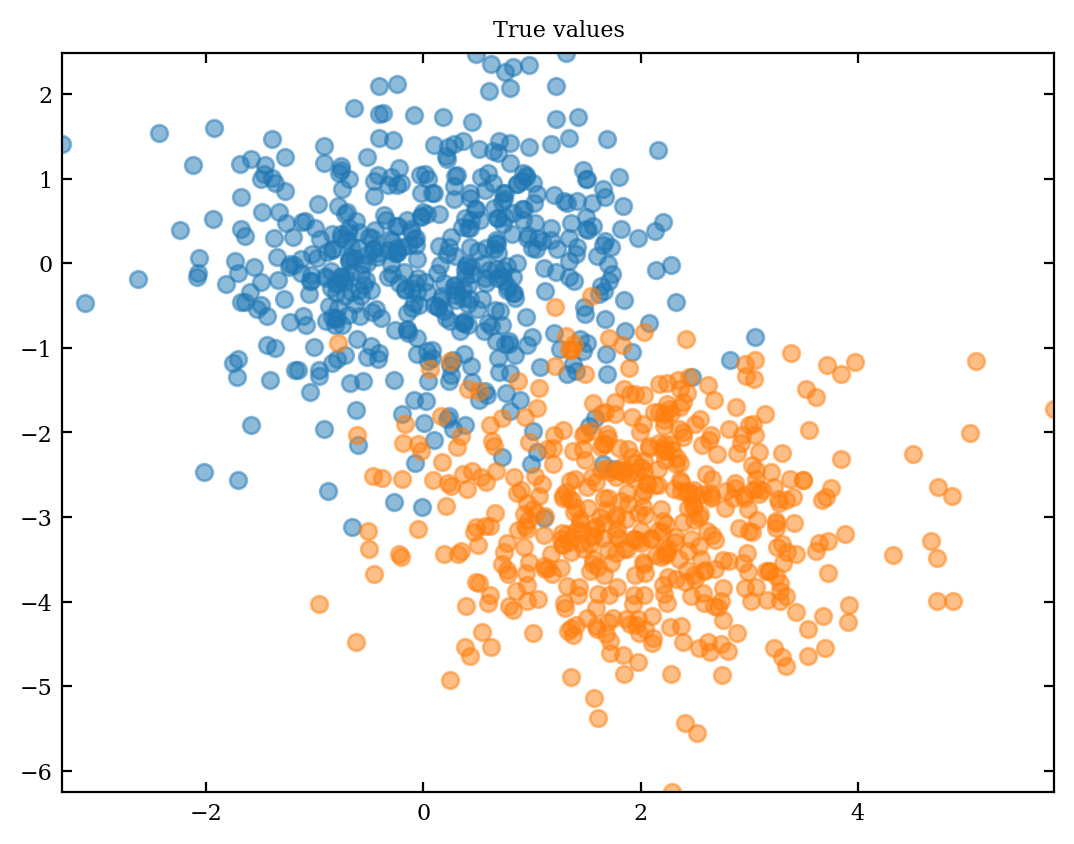

In [24]:
# Generate mock data: 2 sets of Normal-distributed data points (of width 1)
# each set contains 500 data points

mode1= np.random.normal(loc=[0.0,0.0], size=(500,2))   # one centered on 0,0
mode2= np.random.normal(loc=[2.0,-3.0], size=(500,2))  # one centered on 2, -3

X = np.concatenate([mode1,mode2]) # 1000  points in 2D

# let's plot them with the input classes 
plt.title('True values')
plt.scatter(mode1[:,0],mode1[:,1],color='C0',alpha=0.5)
plt.scatter(mode2[:,0],mode2[:,1],color='C1',alpha=0.5)

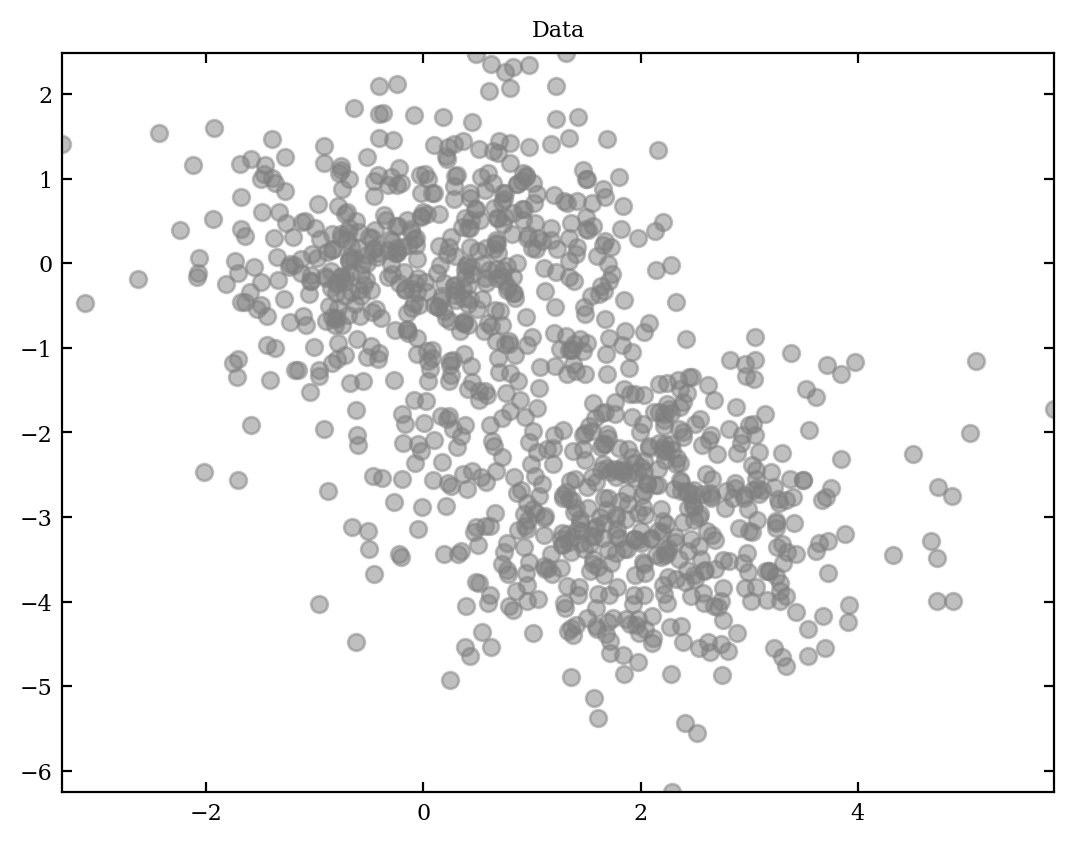

In [25]:
# However, in practice we do not know the truth ! 
# Our (fake) data set should rather look like this
plt.title('Data')
plt.scatter(X[:,0],X[:,1],color='gray',alpha=0.5)


Cluster centers [[ 0.06912707 -0.0327982 ]
 [ 2.02818498 -3.00251108]]


Text(0.5, 1.0, 'Clustering output')

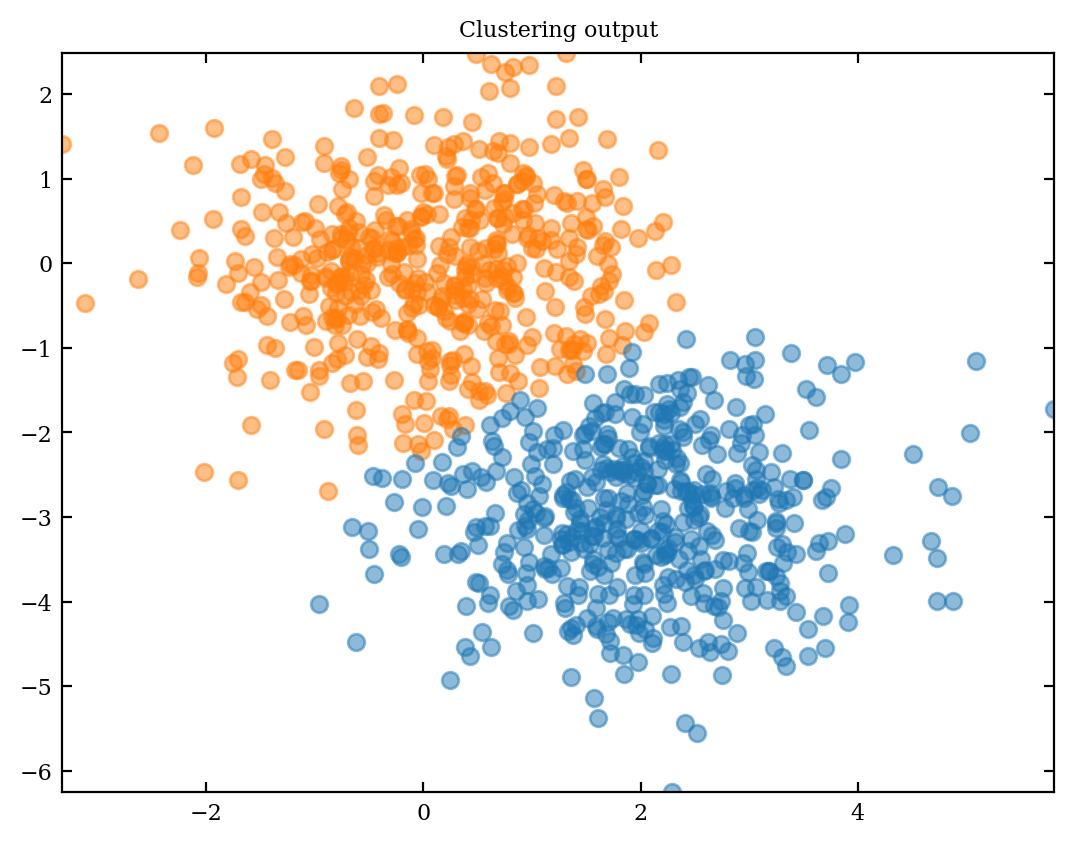

In [26]:
# Now, let's use scikit learn K-learn algorithm to identify classes 
from sklearn.cluster import KMeans


clf = KMeans(n_clusters=2) #Try 2 clusters to start with
clf.fit(X)
centers = clf.cluster_centers_ #location of the clusters

true_labels = np.concatenate([np.zeros(500, dtype=int), np.ones(500, dtype=int)]) # !! THIS IS NOT USED BY KMEANS

labels = clf.predict(X) #labels for each of the points
print('Cluster centers', centers)

# plot the data color-coded by cluster id
colors = ['C1', 'C0', 'C2']
for ii in range(2):
    plt.scatter(X[labels==ii,0], X[labels==ii,1], 
                color=colors[ii],alpha=0.5)

# To get some information on these try:
# KMeans?
# help(clf)
plt.title('Clustering output')


The algorithm does a pretty good job, but it's not perfect. 

Now, let's compute the confusion matrix (but remember this is an **unsupervised** method: we didn't use the true labels in any way ... so in general, we cannot calculate that matrix that way; *How would we proceed to estimate a confusion matrix in a real situation but unsupervised learning?*). 

In [27]:
# Use this cell to calculate confusion matrix, TPR and FPR 
from sklearn.metrics import confusion_matrix
y_true = true_labels
y_pred = clf.predict(X)
cm = confusion_matrix(y_true, y_pred)
cm

array([[480,  20],
       [ 24, 476]])

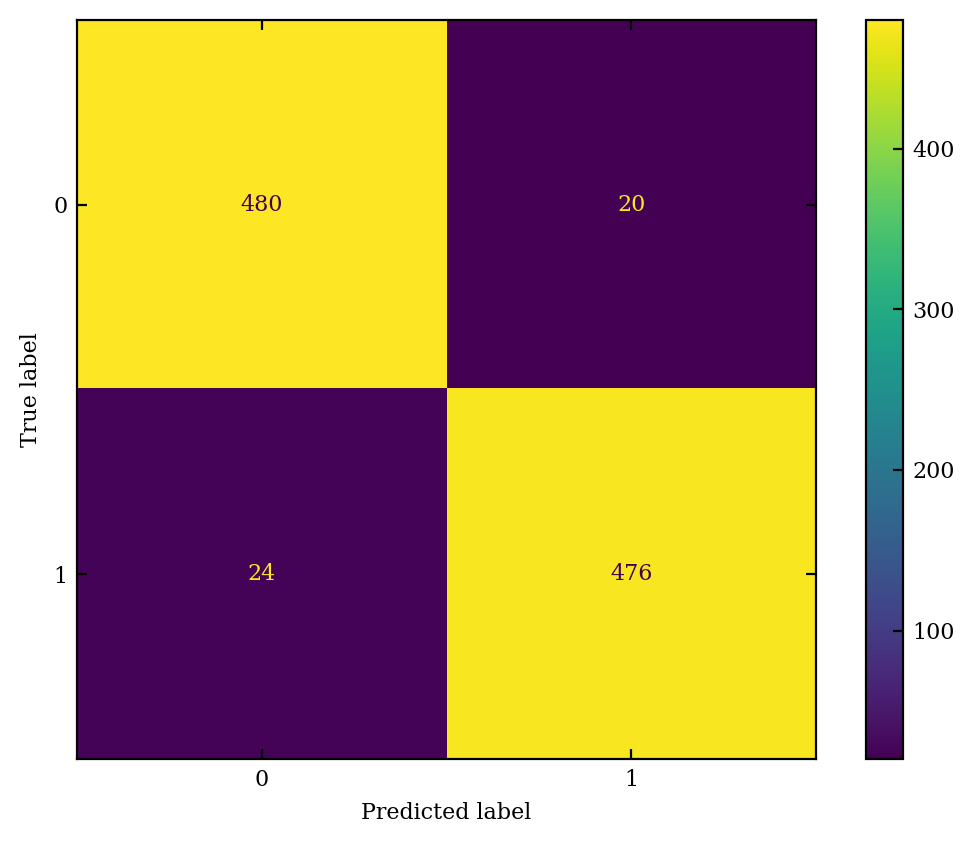

In [28]:
# One can make a nice plot of the confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Display the confusion matrix nicely 
cm_display = ConfusionMatrixDisplay(cm).plot()

Now, let's apply K-means to higher dimensional data set (from G. Richards' lecture "DE2andClustering.ipynb", where he attributes this to Professor Cruz). 

In [29]:
# Execute the next few cells
from astropy.table import Table
t = Table.read('cruz_all_dist.dat', format="ascii")
t

<Table length=150009>
 col1         col2        ...        col4               col5       
int64       float64       ...      float64            float64      
------ ------------------ ... ------------------ ------------------
     0 13.036360391315469 ...  9.042417323170756                0.0
     1 13.332678276917518 ...  9.354531970659059 0.6818411946296692
     2 13.143385594210903 ...  9.309328420726263 0.8201794624328613
     3 13.136152539171645 ...  9.355264367006706 0.9446045160293579
     4 12.863748921645024 ...  9.149645577840083 0.8754007816314697
     5  12.50771470244105 ...  8.973913300752145  1.046165943145752
     6 13.052114907167908 ...  9.297865726056669  0.917402446269989
     7 12.869056675000184 ...  9.159111603276619 0.8589475750923157
     8  12.95242778184901 ...  9.211800388754552   1.06391441822052
   ...                ... ...                ...                ...
149999  6.675090473360192 ...  5.595803204780954  7.365337371826172
150000  6.951301677339009 ...  5.584934507385384  7.483015060424805
150001  7.069037826850577 ...  5.616866531238355  7.457535743713379
150002 6.6426115157078645 ...  5.579452330043495  7.454282283782959
150003 6.5439081451506285 ...  5.629045389162571  7.473056793212891
150004  7.027554349277661 ...  5.592237558473058  7.457190036773682
150005 6.9951972224192875 ...  5.565391951780263   7.43927001953125
150006  6.774377084573097 ... 5.5421044606672165 7.4186272621154785
150007  6.718344034954946 ...  5.569651961120556  7.440407752990723
150008  7.027293366722547 ...  5.559792523183949  7.496155261993408

In [30]:
# Turn these data into a properly formatted Scikit-Learn array
# we ignore column 1 which is index of the data 
X = np.vstack([ t['col2'], t['col3'], t['col4'], t['col5'] ]).T
print(X)

[[13.03636039 -0.11023487  9.04241732  0.        ]
 [13.33267828 -0.10360584  9.35453197  0.68184119]
 [13.14338559 -0.16142859  9.30932842  0.82017946]
 ...
 [ 6.77437708 -0.12553107  5.54210446  7.41862726]
 [ 6.71834403  0.04474092  5.56965196  7.44040775]
 [ 7.02729337  0.12547728  5.55979252  7.49615526]]


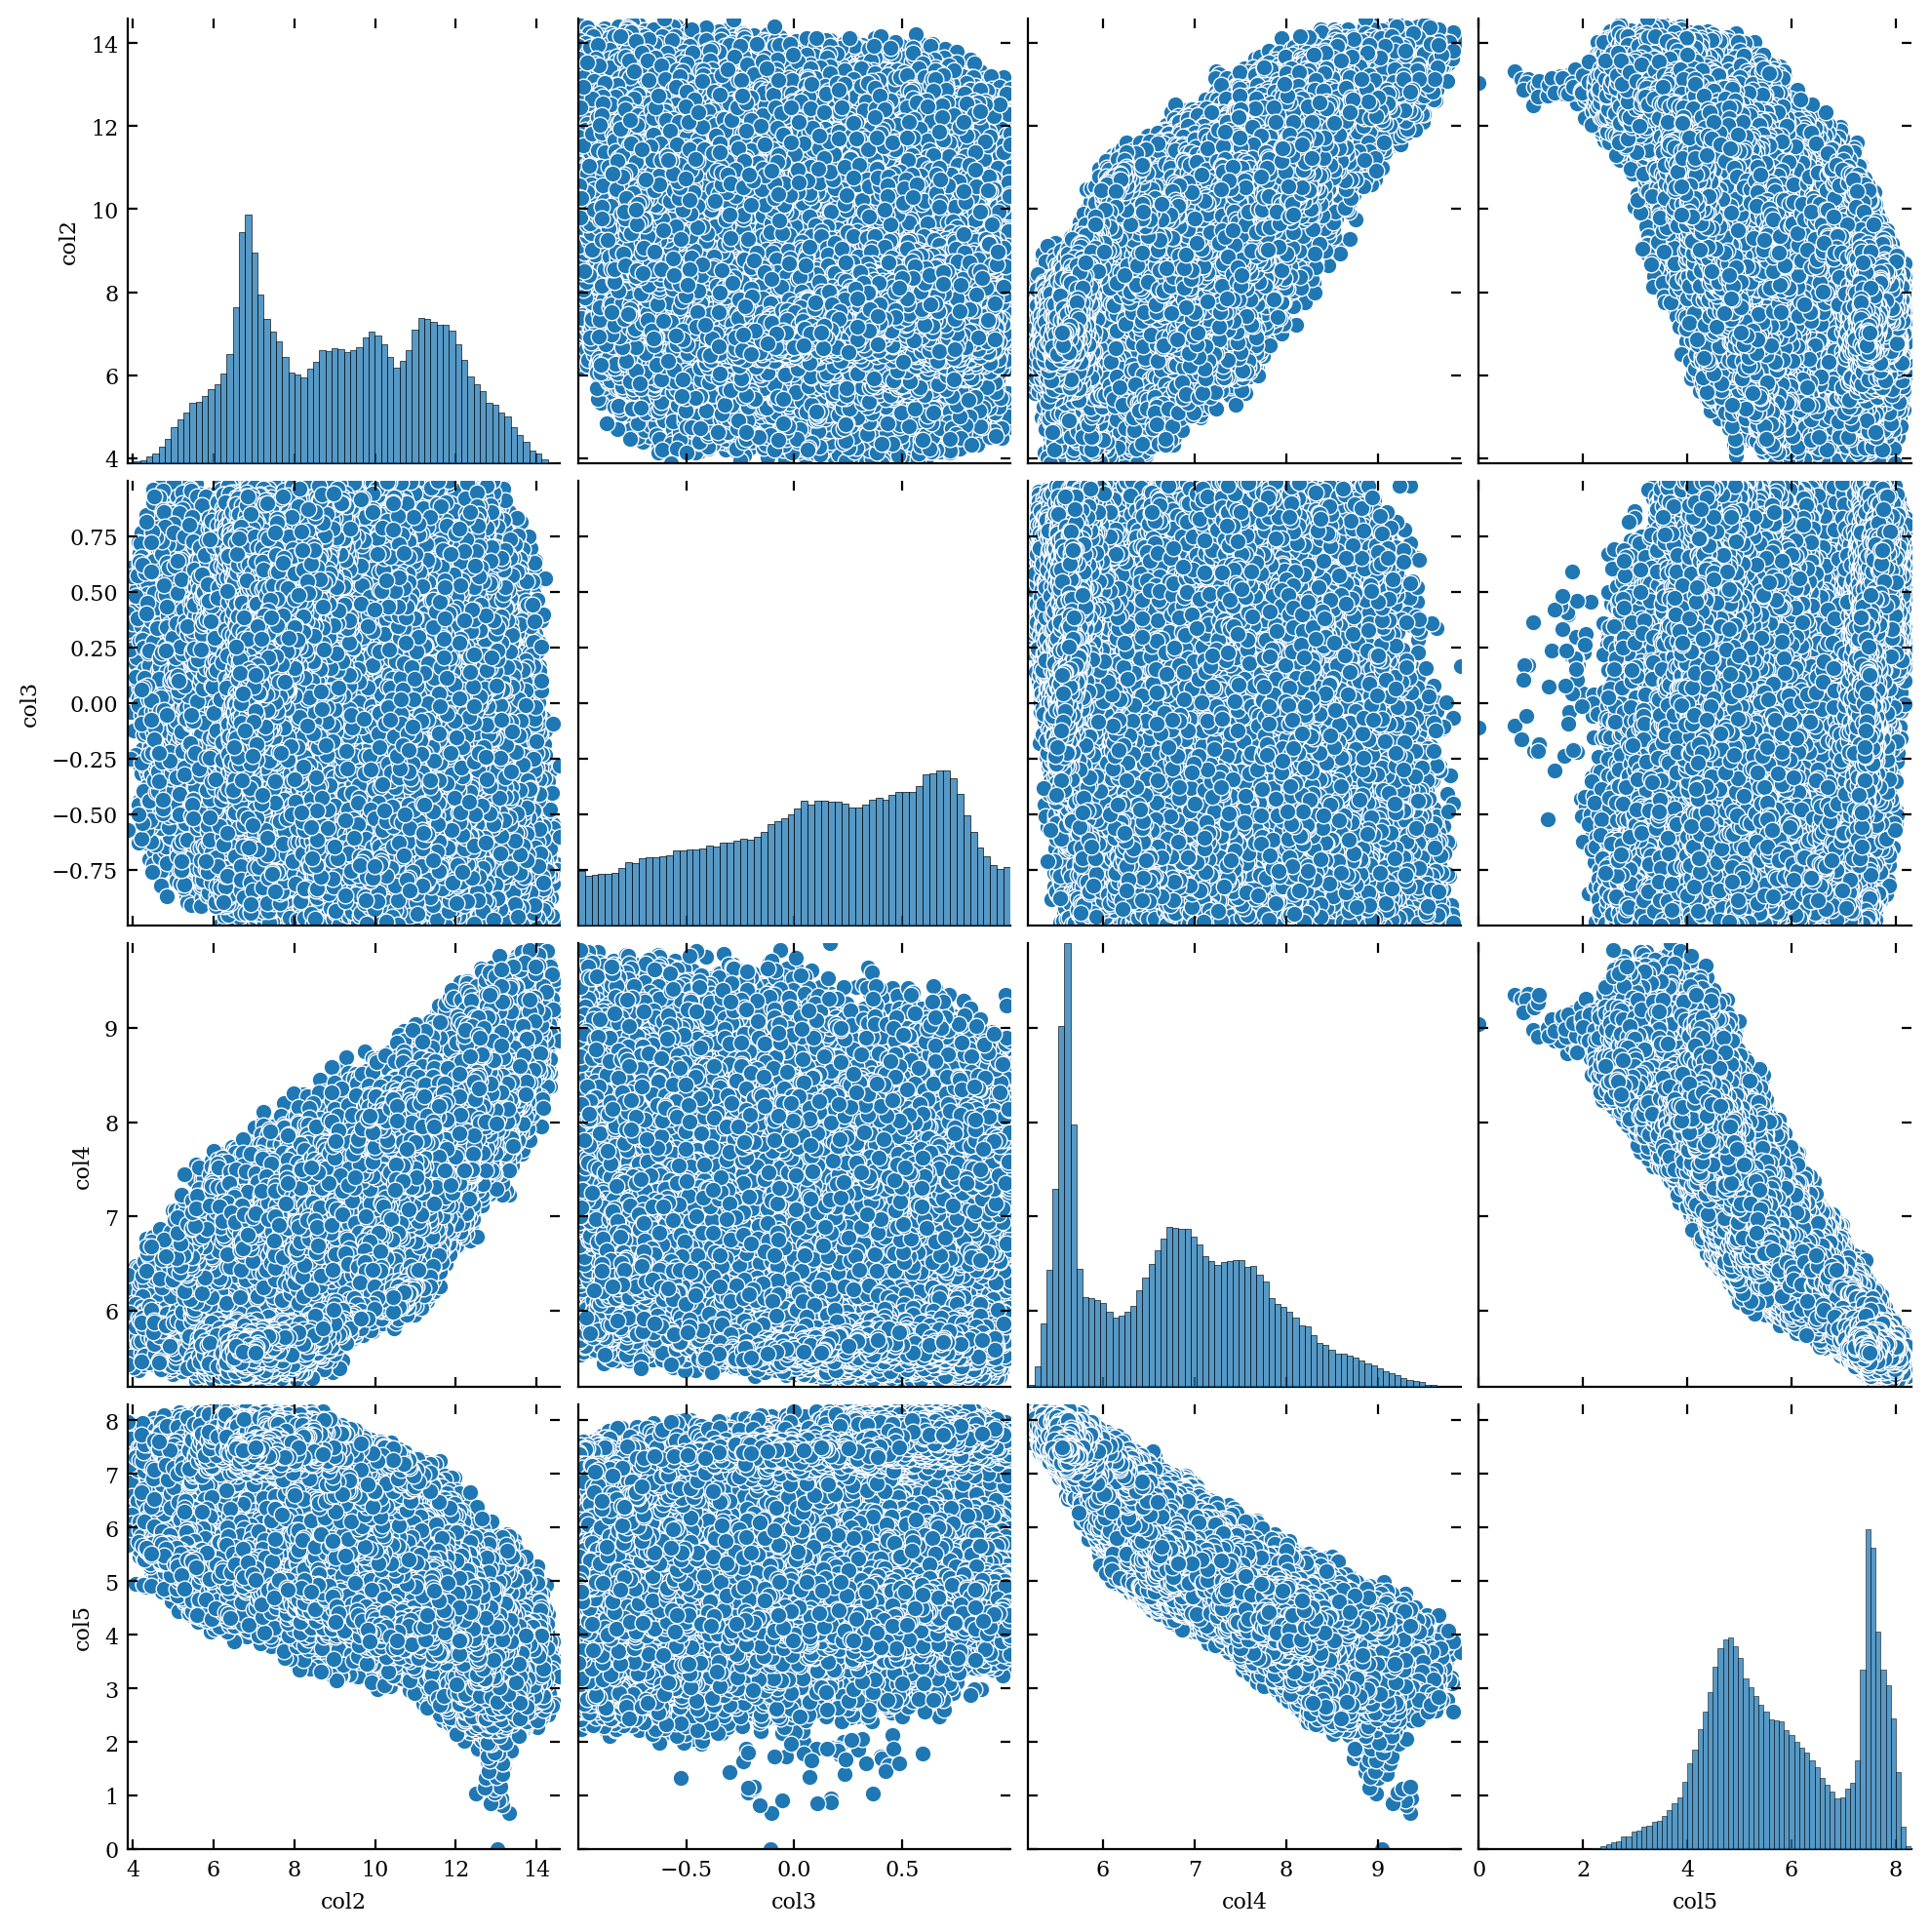

In [31]:
# We can try to visualise it 
from seaborn import pairplot
X_pd = t.to_pandas()
pairplot(X_pd[['col2', 'col3', 'col4', 'col5']])

This is not so easy to visualize in terms of the raw data. There may not be clear clusters like this but correlations are visibles. We can apply PCA to those data as you have seen in the previous lecture and see if some clusters show up. 

Variance carried by each component:  [0.86950949 0.09166926]


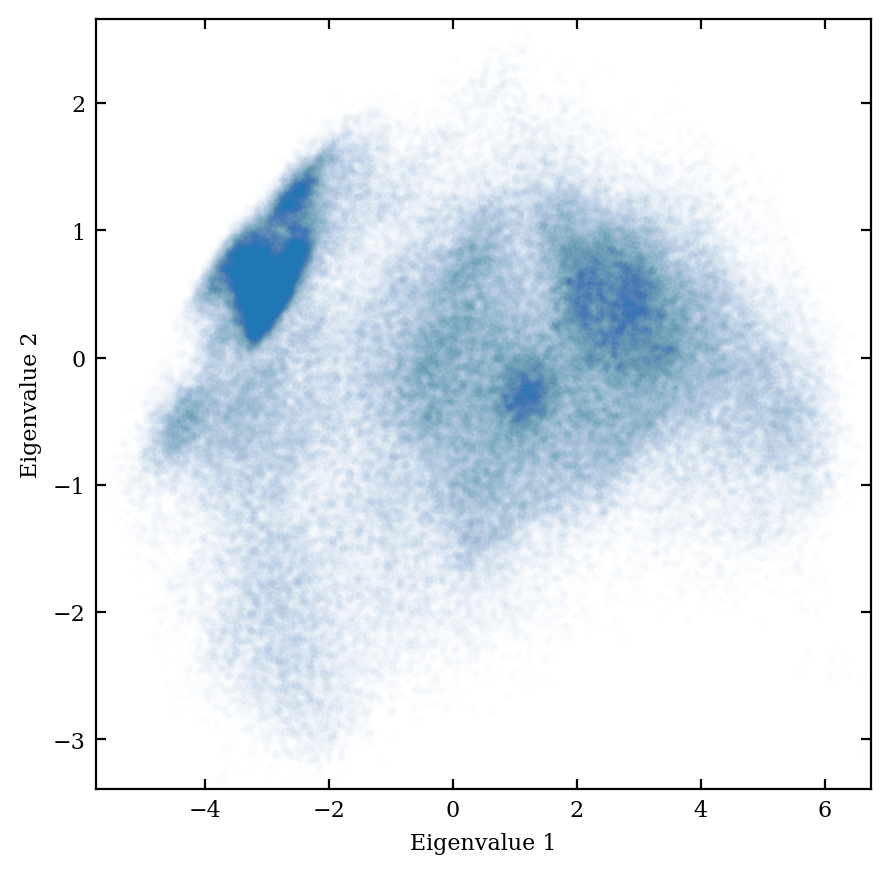

In [32]:
# Project onto 2 axes with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2 components
pca.fit(X) # Do the fitting
print("Variance carried by each component: ", pca.explained_variance_ratio_)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

X_reduced = pca.transform(X) # Apply the PCA to the data 

ax.scatter(X_reduced[:,0], X_reduced[:,1], 
            marker=".", color='C0', 
            alpha=0.01, edgecolors='None')
ax.set_xlabel('Eigenvalue 1');
ax.set_ylabel('Eigenvalue 2');

The above image shows the data projected into **two linear combinations that encompass the directions of greatest variance**. We'll do $K$-means clustering in these dimensions.
  

In [33]:
from sklearn import preprocessing
# Compute the KMeans clustering
n_clusters = 6
scaler = preprocessing.StandardScaler()  # Rescale the PCA to get unit variance 
# Since the data are transformed, one needs to use the method `fit_transform()` 
# which transforms the data into the new basis, and fit the model. 
clf = KMeans(n_clusters=n_clusters) 
clf.fit(scaler.fit_transform(X_reduced))

KMeans(n_clusters=6)

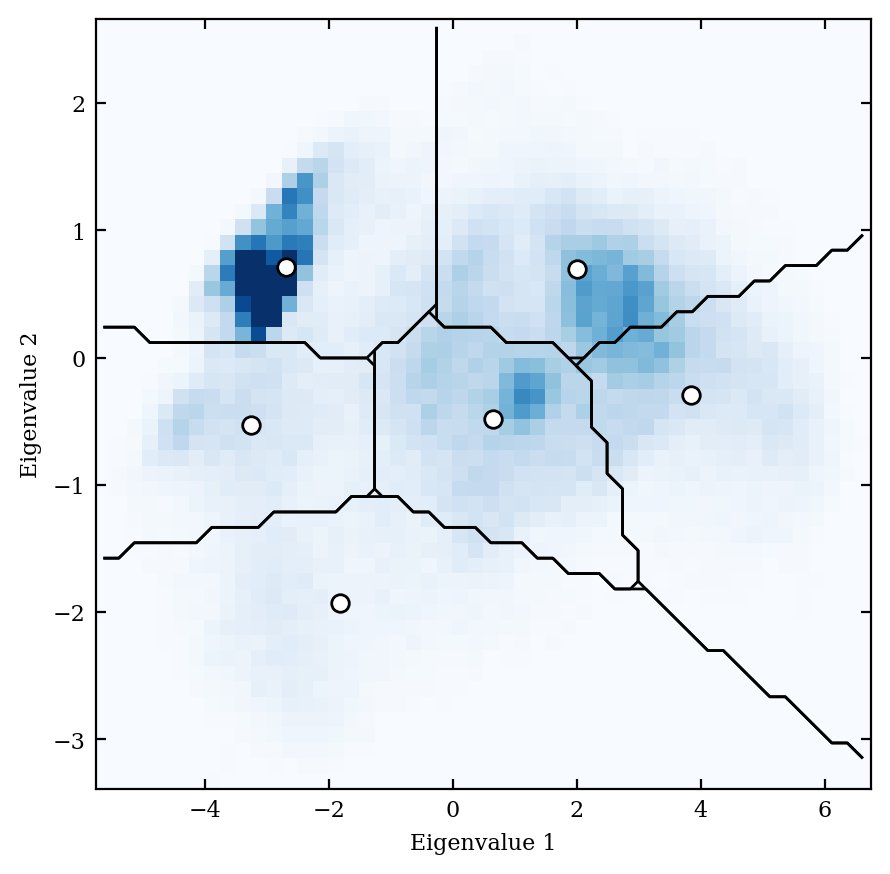

Intertia 51244.0374868216


In [34]:
# Make some plots
f, ax = plt.subplots(figsize=(5, 5))

# Compute a 2D histogram  of the input (instead of individual points ; this helps to visualise overdensities)
# This is also a way to "resample" the data on a grid of nbinsxnbins (below we pick nbins = 50)  
nbins=50
H, xedges, yedges = np.histogram2d(X_reduced[:,0], X_reduced[:,1], nbins)

# plot density 
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[xedges[0], xedges[-1],
                  yedges[0], yedges[-1]],
          cmap='Blues', vmax=700)

# plot cluster centers
cluster_centers = scaler.inverse_transform(clf.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

## calculate and plot cluster boundaries (until the end of the cell)

# first, calculate the centers of the binned data 
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])

Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, nbins * nbins)).T      # Format the grid as shape (nbins*nbins, 2) <-> sklearn feature matrix 

H = clf.predict(scaler.transform(Xgrid)).reshape((nbins, nbins))    # predict targets over the grid 

for i in range(n_clusters):
    # For each cluster the idea is to set to 1 the regions corresponding to the cluster id == i 
    # And set to 0 the others 
    Hcp = H.copy()          
    flag = (Hcp == i)       
    Hcp[flag] = 1
    Hcp[~flag] = 0. 

    ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')
    
    
ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])

ax.set_xlabel('Eigenvalue 1')
ax.set_ylabel('Eigenvalue 2')

plt.show()
print('Intertia', clf.inertia_) 

The ineria is the sum of squared distances of samples to their closest cluster center (weighted by the sample weights if provided). It is hard to get an intuition about inertia, but the closest is the inertia, the better it is. 

In [36]:
# uncomment the following if the above contour looks odd 
# Here is a figure of a binary map (0,1) for the points of the cluster n_cluster=5
#f, ax = plt.subplots(figsize=(5,5))
#ax.imshow(Hcp.reshape(50,50), origin='lower', extent=(x_centers.min(), x_centers.max(), y_centers.min(), y_centers.max()))
#ax.set_aspect('equal')

In [37]:
# For illustration: Same exercise if we do NOT rescale first the PCA 
#from sklearn import preprocessing
# Compute the KMeans clustering
n_clusters = 6
#scaler = preprocessing.StandardScaler()
clf = KMeans(n_clusters, n_init=6)
#clf.fit(scaler.fit_transform(X_reduced))
clf.fit(X_reduced)

KMeans(n_clusters=6, n_init=6)

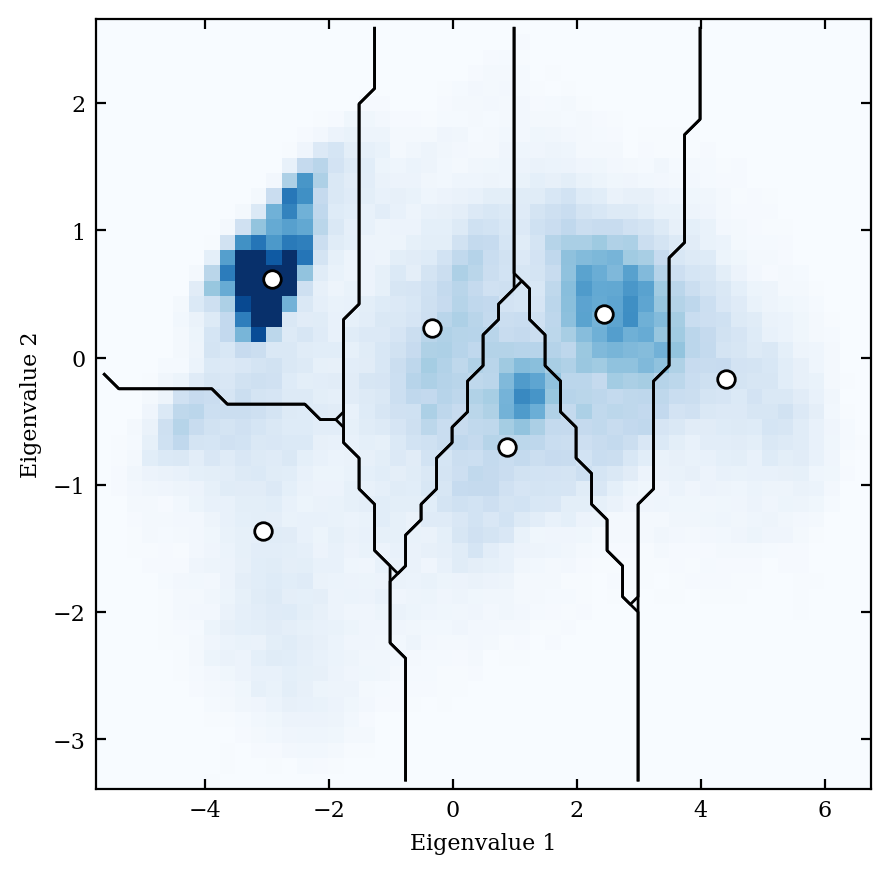

Intertia 116380.24817410205


In [38]:
# Make some plots
f, ax = plt.subplots(figsize=(5, 5))

# Compute a 2D histogram  of the input (instead of individual points ; this helps to visualise overdensities)
# This is also a way to "resample" the data on a grid of nbinsxnbins (below we pick nbins = 50)   
H, xedges, yedges = np.histogram2d(X_reduced[:,0], X_reduced[:,1], 50)

# plot density 
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[xedges[0], xedges[-1],
                  yedges[0], yedges[-1]],
          cmap='Blues', vmax=700)

# plot cluster centers
#cluster_centers = scaler.inverse_transform(clf.cluster_centers_)
cluster_centers = clf.cluster_centers_
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])
Xctr, Yctr = np.meshgrid(x_centers, y_centers)

Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T

#H = clf.predict(scaler.transform(Xgrid)).reshape((50, 50))
H = clf.predict(Xgrid)

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0. 

#    ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
#               linewidths=1, colors='k')
    
    ax.contour(Xctr, Yctr, Hcp.reshape((50, 50)), [-0.5, 0.5], linewidths=1, colors='k')

#    H = clf.predict(scaler.transform(Xgrid)).reshape((50, 50))
    H = clf.predict(Xgrid)
    
ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])

ax.set_xlabel('Eigenvalue 1')
ax.set_ylabel('Eigenvalue 2')

plt.show()
print('Intertia', clf.inertia_)

The results are rather different and inertia is much larger in the second case, suggesting that this is effectively less good. 

### Mean-shift Clustering 

**Mean-shift clustering** works by finding the modes in a kernel density estimator of the distribution (see [sklearn Meanshift description](https://scikit-learn.org/stable/modules/clustering.html#mean-shift) or this [video](https://www.youtube.com/watch?v=3ERPpzrDkVg)). Clustering is achieved by the ***mean-shift algorithm***:

We build a set of "walkers" and make KDE with a specific bandwidth. 
1. Each walker starts at a data point.
2. At each step, the algorithm computes the mean of nearby points weighted by the KDE kernel (essentially a weighted mean shift).
3. The walker moves to this new mean position, effectively following the density gradient.
4. This is repeated until the walker converges to a stable mode (a local peak in density).
5. Walkers that end up at the same mode define clusters.

Let's try this using the same dataset as in $K$-means.

In [39]:
# Compute the Mean-shift clustering
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
bandwidth = 0.4
# estimate the bandwidth using a subsample of the data
#id_sub = np.random.choice(np.arange(0, X_reduced.shape[0]), size=1500, replace=False)
#X_reduced_sub = X_reduced[id_sub,:]
#bandwidth = estimate_bandwidth(X_reduced_sub) 
#bandwidth = estimate_bandwidth(X_reduced) # this takes a *really* long time (scale with n_sample^2)
# -> It would be better randomly select a subsample from the data to estimate the band width)
#print(bandwidth)  
# The bandwidth found this way is also too large ... => we stick to our original choice

ms = MeanShift(bandwidth=bandwidth, 
               bin_seeding=True, 
               cluster_all=False)
ms.fit(scaler.fit_transform(X_reduced))

MeanShift(bandwidth=0.4, bin_seeding=True, cluster_all=False)

[-1  0  1  2  3  4  5  6]
0.4
number of estimated clusters : 7


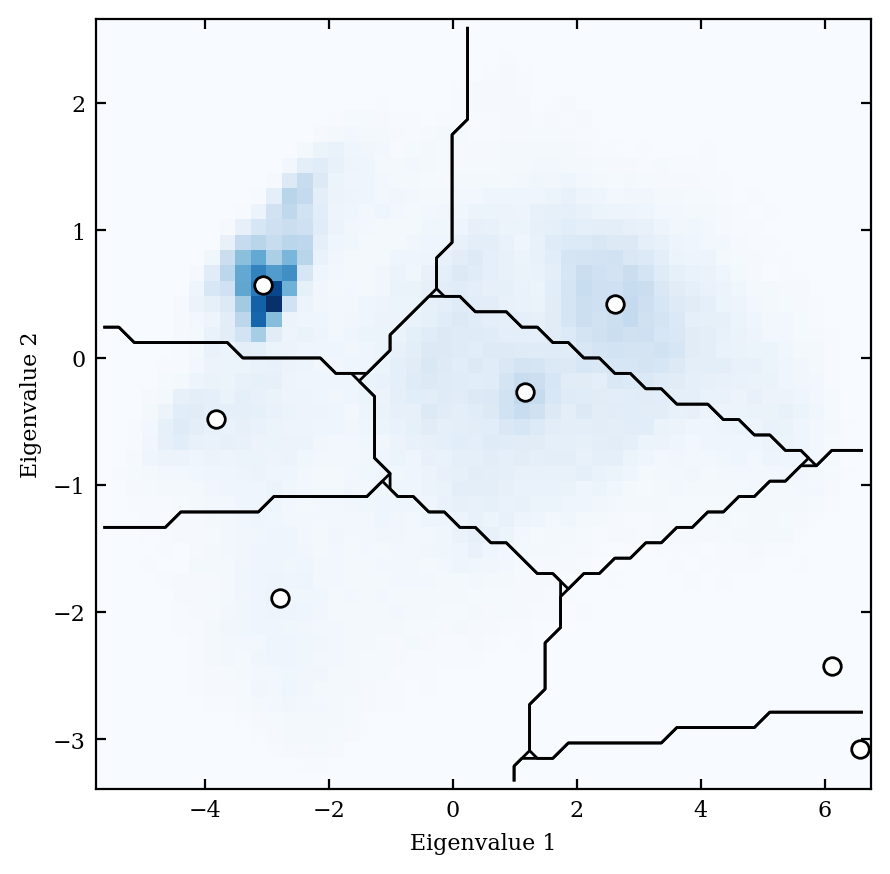

In [40]:
labels_unique = np.unique(ms.labels_)
n_clusters = len(labels_unique[labels_unique >= 0])
print(labels_unique)
print(bandwidth)
print("number of estimated clusters :", n_clusters)

# Make some plots
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

# Compute a 2D histogram  of the input
H, xedges, yedges = np.histogram2d(X_reduced[:,0], X_reduced[:,1], 50)

# plot density
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[xedges[0], xedges[-1],
                  yedges[0], yedges[-1]],
          cmap='Blues')

# plot cluster centers
cluster_centers = scaler.inverse_transform(ms.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])

Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T

H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')
 
    H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))
    
ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])

ax.set_xlabel('Eigenvalue 1')
ax.set_ylabel('Eigenvalue 2')

plt.show()

Mean-shift will not only estimate cluster centers and boundaries, but also the number of clusters!
In principle, the bandwidth can be [estimated from the data](https://ml-explained.com/blog/mean-shift-explained) instead of being chosen by hand as on the example above. 

## Exercise: k-mean to iris data set

Apply the K-mean algorithm and the mean-shift clustering to the iris data set. Compare your results to the results obtained with the GMM. 


The mean-shift finds only 2 clusters if we rescale the data and more clusters if we do not => it is not optimal. 

The notebook [Clustering_and_DE.ipynb](Clustering_and_DE.ipynb) provides a possible solution to this exercise. 

In [ ]:
# Solve the exercise here or in a separate Nb 

**Comment on the results:** This exercise shows that K-mean is less efficient (accuracy $\sim$80%) than GMM probably because the clusters are not well separated by hyper-spheres. The K-mean performances improve if we apply them on a PCA-reduced parameter space. In that case, the accuracy reaches almost 90%. Still less good than the GMM. We however do not expect the GMM to generically perform better. As we have seen earlier, the GMM is good in approximating the distribution, but less good for evaluating the number of components.  


## Exercise: k-mean applied to handwritten digits

There is one popular and fun data set available in sklearn, it is the one from the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This dataset contains a set of images with handwritten digts. It is probably also one of the most widely used and best studied datasets in the whole of machine learning. 

To load the data set you may use the function 'sklearn.datasets.load_digits()'. Take a few minutes to read the `DESCR`-iption of this data set. 

This dataset comes with labels, but for this exercise, we will ignore the latter and see if we are able to identify the existence of 10 classes using unsupervised learning methods. Then we will compare the results to the truth to evaluate the performances of our algorithm. This can be seen as a sort of benchmarking.  

- Load the data set 
- Visualise a subsample of the data set (e.g. 10x10 images containing 100 different digits).
- Apply the K-mean to this data set to identify 10 clusters corresponding to the 10 digits.
- Visually inspect the 10 centers of the k-means and maps the "k-means labels" to the "true label". E.g. if the first cluster (i.e. cluster \#0) correspond to digit 3 you will have to relabel the predictions of k-means to 3, and so-on for the 10 different clusters.
- Calculate the accuracy score of the k-mean
- Calculate and visualise the confusion matrix, comparing the predicted labels to the truth. TIP: Search for `ConfusionMatrixDisplay`, `confusion_matrix` in `sklearn.metrics`

**BONUS**: If you have time, try to improve the accuracy of the identification by first using a dimensionality reduction method prior to using the K-means. The t-SNE gives pretty amazing results but you may need to "cheat" using the known labels to relabel the prediction of the tSNE-kmean. You may relabel the output of tSNE by relabeling each k-mean label using the maximum number of occurence of the true-label for each k-mean label. 



The notebook [Clustering_and_DE.ipynb](Clustering_and_DE.ipynb) provides a possible solution to this exercise. 

### Correlation functions 

(This is optional / supplementary material)

> ***Correlation functions*** *tell us how far (and on what scales) a distribution of data samples differs from a random distribution.*

They have been used extensively in astrophysics, e.g., 
- examining fluctuations and structure on varying scales of the galaxy density distribution in terms of luminosity, galaxy type, age of the Universe.
- examining the two-point correlation function of temperature fluctuations of the cosmic microwave background to unveil the composition of the Universe.
- searching for long-timescale correlations in time-series data to examine noise in AGN lightcurves or find GW signals in pulsar-timing data.

The key aspect of correlation function statistics is that they can be used as metrics for testing models of structure formation and evolution directly against data. 


![](https://www.astroml.org/_images/fig_corr_diagram_1.png)


One of the most prominent is the **two-point correlation function** which characterizes the excess probability of finding pairs of points at varying separations when compared to a random distribution. It can be described in terms of the power spectrum of fluctuations, $P(k)$ where $k=2\pi/\lambda$ and $\lambda$ is the scale/wavelength of the fluctuation (you may recognize herebelow the Fourier transform of the power spectrum $P(k)$):

$$ \xi(r) = \frac{1}{2\pi^2}\int dk\, k^2 P(k)\frac{\sin(kr)}{kr}.$$

This correlation function can be used to describe the density fluctuations of sources by

$$ \xi(r) = \left\langle \frac{\delta\rho(x)}{\rho}\frac{\delta\rho(x+r)}{\rho}\right\rangle,$$

where $\delta\rho(x)/\rho = (\rho-\bar\rho)/\rho$ is the density contrast relative to the mean $\bar\rho$ at position $x$.

In many situations in astronomy or cosmology, the spatial correlation function or angular correlation function is modeled as a power-law, e.g. $w(\theta) = (\theta/\theta_0)^\delta$. Angular correlation functions are often used because we care about *projected structure* on different scales, rather than depth clustering, e.g., in the CMB this kind of angular clustering is indicative of fluctuations in the primordial density field that can unveil the composition of the Universe at the time of last scattering.

Higher $n$-point correlation functions can be computed (see the image above), but the two-point function is the most common. Why? When dealing with large populations of sources spread across the Universe, we can often invoke the central limit theorem to describe the statistical distribution of sources-- hence **correlations can be approximated as obeying Gaussian statistics, which are entirely defined by the mean and two-point correlators (i.e. the variance)**. 

While high order (i.e. order > 2!) correlation function (can be interpreted as a probability of finding a given "configuration of points" such as excess of triplets of objects for 3pt) are less studied, this might change with upcoming "all sky" surveys like Euclid and increase in computing ressources. 

In [41]:
# Execute this cell to implement AstroML's two-point correlation function on some random data
from astroML.correlation import two_point_angular

RA = 40 * np.random.random(1000)
DEC = 10 * np.random.random(1000) # ra and dec in degrees

bins = np.linspace(0.1, 10.0, 11) # edges for the 10 bins to evaluate
corr = two_point_angular(RA, DEC, bins, method='landy-szalay')
print(corr)

[-3.00433960e-03 -7.50801993e-04  1.32685936e-02  1.12375843e-02
 -1.05682551e-05  1.23091126e-03  7.52580008e-03 -1.14699301e-02
 -9.01853647e-03 -1.59753274e-02]


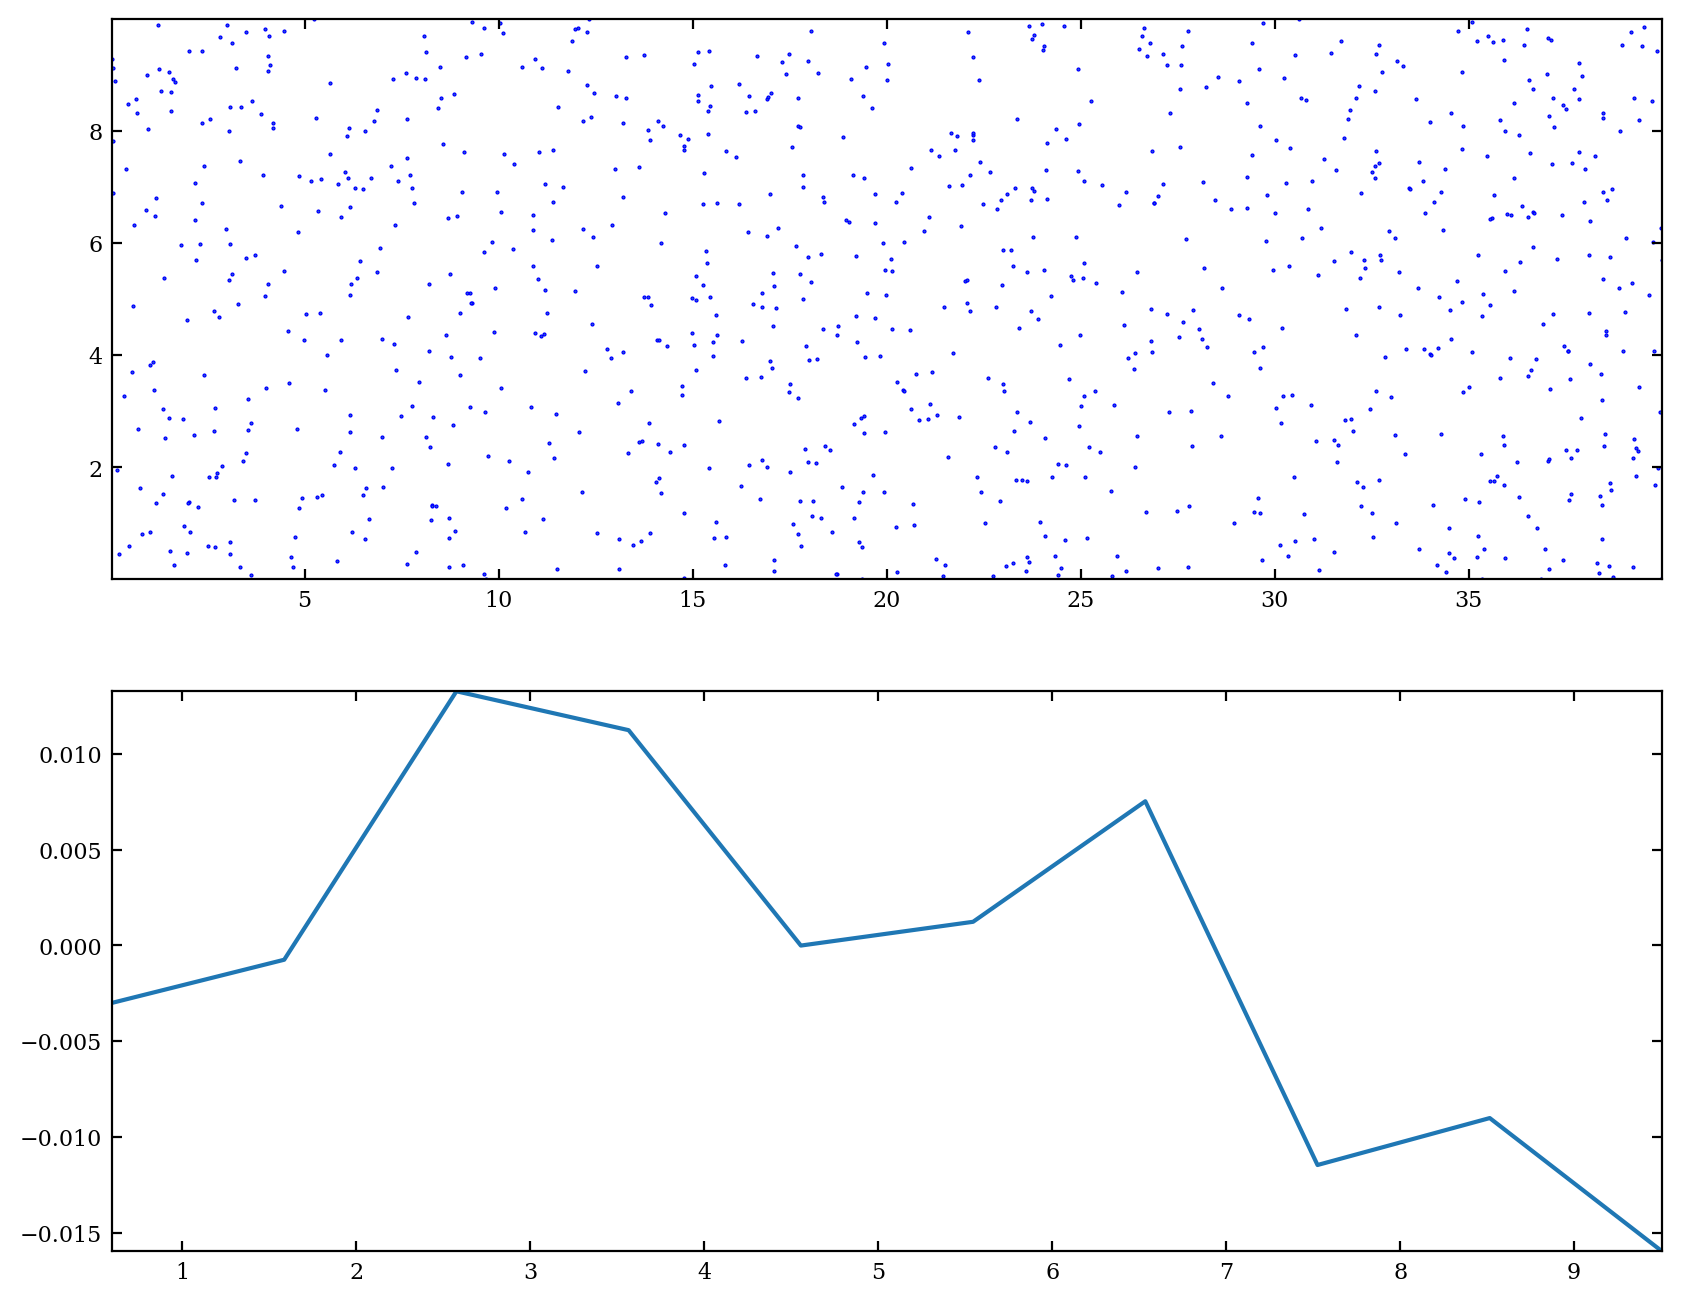

In [42]:
f, ax = plt.subplots(nrows=2, figsize=(10,8))
ax[0].scatter(RA, DEC, s=1, marker='.')
bin_centers = 0.5 * (bins[1:] + bins[:-1])
ax[1].plot(bin_centers, corr)

Now try the example from Figure 6.17 of the textbook. This computes the angular correlation function for a subset of the SDDS spectroscopic galaxy sample in the range $0.08<z<0.12$. This may take some time to run (> 1 min).

In [43]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function, division

from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_sdss_specgals
from astroML.correlation import bootstrap_two_point_angular

#------------------------------------------------------------
# Get data and do some quality cuts
data = fetch_sdss_specgals()
m_max = 17.7

# redshift and magnitude cuts
data = data[data['z'] > 0.08]
data = data[data['z'] < 0.12]
data = data[data['petroMag_r'] < m_max]

# RA/DEC cuts
RAmin, RAmax = 140, 220
DECmin, DECmax = 5, 45
data = data[data['ra'] < RAmax]
data = data[data['ra'] > RAmin]
data = data[data['dec'] < DECmax]
data = data[data['dec'] > DECmin]

ur = data['modelMag_u'] - data['modelMag_r']
flag_red = (ur > 2.22)
flag_blue = ~flag_red

data_red = data[flag_red]
data_blue = data[flag_blue]

print("data size:")
print("  red gals: ", len(data_red))
print("  blue gals:", len(data_blue))

data size:
  red gals:  38017
  blue gals: 16883


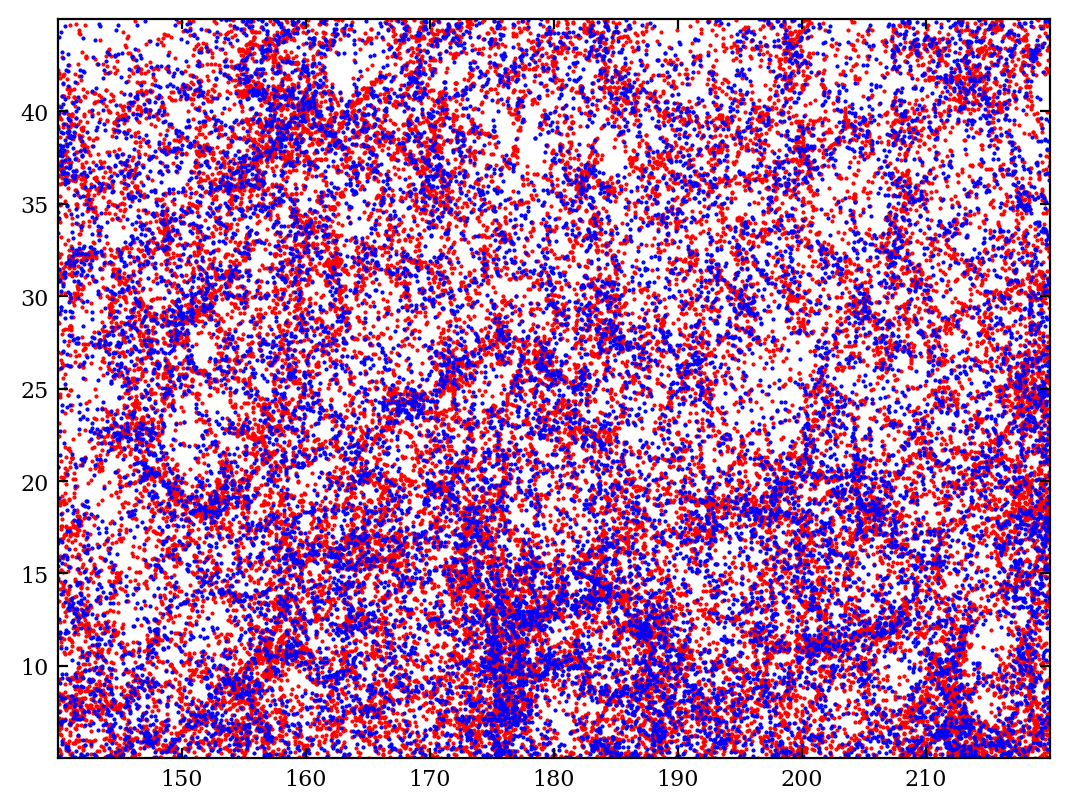

In [44]:
plt.scatter(data_red['ra'], data_red['dec'], color='red', marker='.', s=1)
plt.scatter(data_blue['ra'], data_blue['dec'], color='blue', marker='.', s=1)

@pickle_results: using precomputed results from 'correlation_functions.pkl'


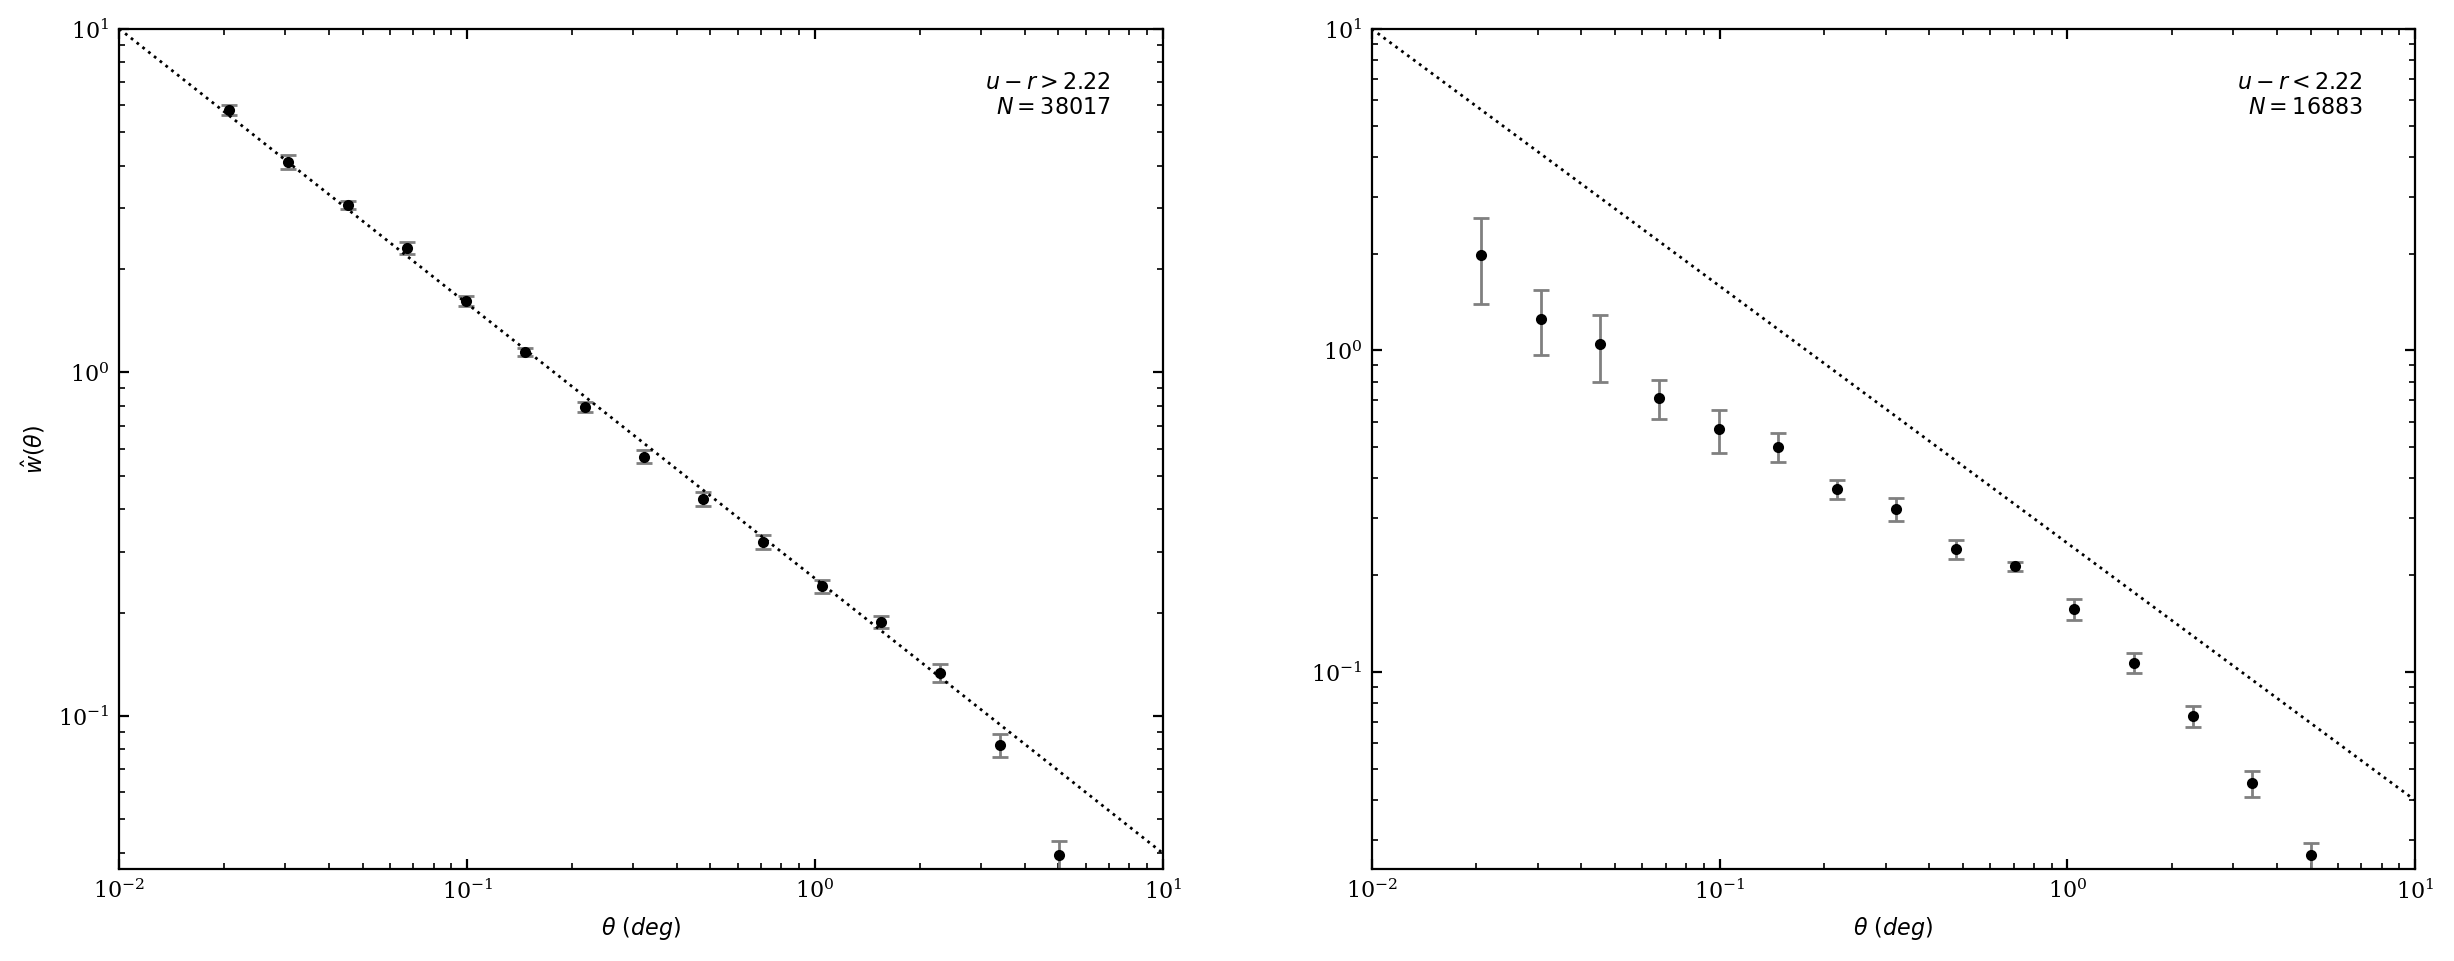

In [45]:
#-----------------------------------------------------------
# Set up correlation function computation
#  This calculation takes a long time with the bootstrap resampling,
#  so we'll save the results.
@pickle_results("correlation_functions.pkl")
def compute_results(Nbins=16, Nbootstraps=10,  method='landy-szalay', rseed=0):
    np.random.seed(rseed)
    bins = 10 ** np.linspace(np.log10(1 / 60.), np.log10(6), 16)

    results = [bins]
    for D in [data_red, data_blue]:
        results += bootstrap_two_point_angular(D['ra'],
                                               D['dec'],
                                               bins=bins,
                                               method=method,
                                               Nbootstraps=Nbootstraps)

    return results

(bins, r_corr, r_corr_err, r_bootstraps,
 b_corr, b_corr_err, b_bootstraps) = compute_results()

bin_centers = 0.5 * (bins[1:] + bins[:-1])

#------------------------------------------------------------
# Plot the results
corr = [r_corr, b_corr]
corr_err = [r_corr_err, b_corr_err]
bootstraps = [r_bootstraps, b_bootstraps]
labels = ['$u-r > 2.22$\n$N=%i$' % len(data_red),
          '$u-r < 2.22$\n$N=%i$' % len(data_blue)]

fig = plt.figure(figsize=(14, 6))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)

for i in range(2):
    ax = fig.add_subplot(121 + i, xscale='log', yscale='log')

    ax.errorbar(bin_centers, corr[i], corr_err[i],
                fmt='.k', ecolor='gray', lw=1)

    t = np.array([0.01, 10])
    ax.plot(t, 10 * (t / 0.01) ** -0.8, ':k', linewidth=1)

    ax.text(0.95, 0.95, labels[i],
            ha='right', va='top', transform=ax.transAxes)
    ax.set_xlabel(r'$\theta\ (deg)$')
    if i == 0:
        ax.set_ylabel(r'$\hat{w}(\theta)$')


plt.show()

The left panel shows red galaxies with $u-r>2.22$ and the right panel shows blue galaxies with $u-r<2.22$. Uncertainties are derived from $10$ [bootstrap samplings](Bootstrap_jacknife.ipynb) (We skip bootstrap for now, but feel free to look at the [notebook](Bootstrap_jacknife.ipynb) to learn more about it). There is significantly greater correlation structure on small angular scales in red galaxies than in blue galaxies. 

With tens of thousands of galaxies in each sample, this code has been optimized using **Scikit-Learn's ball-tree method for computing the correlation function-- further details given in Chapter 2, Section 2.5.2**.

## References

- **Chapter 6** (and 4.4 for gaussian mixtures) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. (2014)
- Astro-statistics lecture by Davide Gerosa: https://github.com/dgerosa/astrostatistics_bicocca_2022  (in particular lectures 14 and 16)
- Scikit-learn documentation on [unsupervised learning](https://scikit-learn.org/stable/unsupervised_learning.html)
- CLustering algorithms described simply and with GIF animations: [https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)
- Specific explanation of mean-shift: [https://ml-explained.com/blog/mean-shift-explained](https://ml-explained.com/blog/mean-shift-explained)  
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas
- [Introduction to astroML: Machine learning for astrophysics](http://ieeexplore.ieee.org/xpl/articleDetails.jsp?tp=&arnumber=6382200), Vanderplas et al, proc. of CIDU, pp. 47-54, 2012.
- [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn//printings/ESLII_print12_toc.pdf), Hastie, Tibshirani & Friedman, 2017.
- A compilation of a large variety of data sets that can be used to train ML models: [https://github.com/awesomedata/awesome-public-datasets/tree/travis](https://github.com/awesomedata/awesome-public-datasets/tree/travis) (Note that the default branch contains only a couple of data sets links) 
- David Hogg, Data analysis recipes: Choosing the binning for a histogram, 2008, [https://arxiv.org/abs/0807.4820](https://arxiv.org/abs/0807.4820)
- More on [Gaussian mixture models](http://pmelchior.net/blog/gaussian-mixture-models-for-astronomy.html) and [clustering](https://pmelchior.net/blog/data-science-in-astronomy-clustering.html) in astronomy on Peter Melchior's blog [https://pmelchior.net/blog](https://pmelchior.net/blog)
- Mixture models in Astronomy: Kuhn and Feigelson 2017 ([arXiv:1711.11101](https://arxiv.org/abs/1711.11101))
- An [online course on non parametric Statistics](https://bookdown.org/egarpor/NP-UC3M/) by Eudardo Garcia-Portuges, including lectures on density estimation:  [https://bookdown.org/egarpor/NP-UC3M/kde-i-kde.html](https://bookdown.org/egarpor/NP-UC3M/kde-i-kde.html). 